DO OR DIE: A Data Exploration of Carbon Dioxide Emission to Improve the Implementation of NDC in the Philippines

  

( (https://www.epa.gov/ghgemissions/overview-greenhouse-gases#:~:text=Carbon%20Dioxide%20Emissions&text=Carbon%20dioxide%20(CO2)%20is,gas%20emissions%20from%20human%20activities.)

https://leadthechange.bard.edu/blog/too-late-to-stop-global-warming-a-response-to-franzen

https://unfccc.int/process-and-meetings/the-paris-agreement/nationally-determined-contributions-ndcs/nationally-determined-contributions-ndcs

https://www.ndcs.undp.org/content/ndc-support-programme/en/home/our-work/geographic/asia-and-pacific/Philippines.html

https://www.greenpeace.org/philippines/story/10376/doe-must-step-up-to-mend-phs-delayed-underwhelming-climate-targets/




In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
#import the co2 emission datasets and convert it into dataframe.
df1 = pd.read_excel('co2_emissions_and_gdp.xlsx')
dfa = pd.DataFrame(df1)
dfa

Entity Code  Year  Annual_CO2_emissions  \
0     Afghanistan  AFG  1990             2603238.0   
1     Afghanistan  AFG  1991             2427366.0   
2     Afghanistan  AFG  1992             1379462.0   
3     Afghanistan  AFG  1993             1333055.0   
4     Afghanistan  AFG  1994             1281602.0   
...           ...  ...   ...                   ...   
8341     Zimbabwe  ZWE  2015            12225821.0   
8342     Zimbabwe  ZWE  2016            10737567.0   
8343     Zimbabwe  ZWE  2017             9581633.0   
8344     Zimbabwe  ZWE  2018            11854367.0   
8345     Zimbabwe  ZWE  2019            10949084.0   

      Annual_consumption_based_CO2_emissions  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
8341                            1.335005e+07   
8342                            1.215270e+07   
8343                            1.124765e+07   
8344                            1.316274e+07   
8345                            1.242178e+07   

      GDP_PPP_constant_2017_international  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  
...                                   ...  
8341                         4.419279e+10  
8342                         4.452683e+10  
8343                         4.661933e+10  
8344                         4.824968e+10  
8345                         4.434145e+10  

[8346 rows x 6 columns]

In [3]:
#Remove the columns that is not needed or wont be the focus of the study.
dfa.drop(dfa.columns[[4,5]], axis = 1, inplace = True)
dfa

Entity Code  Year  Annual_CO2_emissions
0     Afghanistan  AFG  1990             2603238.0
1     Afghanistan  AFG  1991             2427366.0
2     Afghanistan  AFG  1992             1379462.0
3     Afghanistan  AFG  1993             1333055.0
4     Afghanistan  AFG  1994             1281602.0
...           ...  ...   ...                   ...
8341     Zimbabwe  ZWE  2015            12225821.0
8342     Zimbabwe  ZWE  2016            10737567.0
8343     Zimbabwe  ZWE  2017             9581633.0
8344     Zimbabwe  ZWE  2018            11854367.0
8345     Zimbabwe  ZWE  2019            10949084.0

[8346 rows x 4 columns]

In [4]:
#reset the index and drop the Nan value
dfa_new=dfa.dropna().reset_index(drop=True)
dfa_new

Entity Code  Year  Annual_CO2_emissions
0     Afghanistan  AFG  1990             2603238.0
1     Afghanistan  AFG  1991             2427366.0
2     Afghanistan  AFG  1992             1379462.0
3     Afghanistan  AFG  1993             1333055.0
4     Afghanistan  AFG  1994             1281602.0
...           ...  ...   ...                   ...
6563     Zimbabwe  ZWE  2015            12225821.0
6564     Zimbabwe  ZWE  2016            10737567.0
6565     Zimbabwe  ZWE  2017             9581633.0
6566     Zimbabwe  ZWE  2018            11854367.0
6567     Zimbabwe  ZWE  2019            10949084.0

[6568 rows x 4 columns]

In [5]:
#Drop the rows of the overall record of world carbon emission as the data needed is only per caountry
dfa_new.drop(dfa_new[dfa_new['Entity'] == 'World'].index, inplace = True)
pd.set_option('max_rows',None)
dfa_new

Entity      Code  Year  Annual_CO2_emissions
0                          Afghanistan       AFG  1990          2.603238e+06
1                          Afghanistan       AFG  1991          2.427366e+06
2                          Afghanistan       AFG  1992          1.379462e+06
3                          Afghanistan       AFG  1993          1.333055e+06
4                          Afghanistan       AFG  1994          1.281602e+06
5                          Afghanistan       AFG  1995          1.230463e+06
6                          Afghanistan       AFG  1996          1.164920e+06
7                          Afghanistan       AFG  1997          1.084127e+06
8                          Afghanistan       AFG  1998          1.029157e+06
9                          Afghanistan       AFG  1999          8.095120e+05
10                         Afghanistan       AFG  2000          7.576720e+05
11                         Afghanistan       AFG  2001          7.979620e+05
12                         Afghanistan       AFG  2002          1.051609e+06
13                         Afghanistan       AFG  2003          1.185951e+06
14                         Afghanistan       AFG  2004          8.891670e+05
15                         Afghanistan       AFG  2005          1.303267e+06
16                         Afghanistan       AFG  2006          1.635378e+06
17                         Afghanistan       AFG  2007          2.268605e+06
18                         Afghanistan       AFG  2008          4.199530e+06
19                         Afghanistan       AFG  2009          6.739976e+06
20                         Afghanistan       AFG  2010          8.397779e+06
21                         Afghanistan       AFG  2011          1.210579e+07
22                         Afghanistan       AFG  2012          1.021851e+07
23                         Afghanistan       AFG  2013          8.440766e+06
24                         Afghanistan       AFG  2014          7.774340e+06
25                         Afghanistan       AFG  2015          7.904133e+06
26                         Afghanistan       AFG  2016          6.744628e+06
27                         Afghanistan       AFG  2017          6.859825e+06
28                         Afghanistan       AFG  2018          8.344829e+06
29                         Afghanistan       AFG  2019          1.214667e+07
30                             Albania       ALB  1990          5.444704e+06
31                             Albania       ALB  1991          4.228256e+06
32                             Albania       ALB  1992          2.495184e+06
33                             Albania       ALB  1993          2.315648e+06
34                             Albania       ALB  1994          1.912608e+06
35                             Albania       ALB  1995          2.066496e+06
36                             Albania       ALB  1996          1.993216e+06
37                             Albania       ALB  1997          1.531552e+06
38                             Albania       ALB  1998          1.744064e+06
39                             Albania       ALB  1999          2.975168e+06
40                             Albania       ALB  2000          3.004480e+06
41                             Albania       ALB  2001          3.220656e+06
42                             Albania       ALB  2002          3.748272e+06
43                             Albania       ALB  2003          4.231920e+06
44                             Albania       ALB  2004          4.103680e+06
45                             Albania       ALB  2005          4.198944e+06
46                             Albania       ALB  2006          3.843536e+06
47                             Albania       ALB  2007          3.828880e+06
48                             Albania       ALB  2008          4.272224e+06
49                             Albania       ALB  2009          4.253904e+06
50                             Albania       ALB  2010          4.448096e+06
51                          

In [6]:
#Dropped the column of country code
dfa_new_nocode = dfa_new.drop(['Code'], axis=1)
dfa_new_nocode 

Entity  Year  Annual_CO2_emissions
0                          Afghanistan  1990          2.603238e+06
1                          Afghanistan  1991          2.427366e+06
2                          Afghanistan  1992          1.379462e+06
3                          Afghanistan  1993          1.333055e+06
4                          Afghanistan  1994          1.281602e+06
5                          Afghanistan  1995          1.230463e+06
6                          Afghanistan  1996          1.164920e+06
7                          Afghanistan  1997          1.084127e+06
8                          Afghanistan  1998          1.029157e+06
9                          Afghanistan  1999          8.095120e+05
10                         Afghanistan  2000          7.576720e+05
11                         Afghanistan  2001          7.979620e+05
12                         Afghanistan  2002          1.051609e+06
13                         Afghanistan  2003          1.185951e+06
14                         Afghanistan  2004          8.891670e+05
15                         Afghanistan  2005          1.303267e+06
16                         Afghanistan  2006          1.635378e+06
17                         Afghanistan  2007          2.268605e+06
18                         Afghanistan  2008          4.199530e+06
19                         Afghanistan  2009          6.739976e+06
20                         Afghanistan  2010          8.397779e+06
21                         Afghanistan  2011          1.210579e+07
22                         Afghanistan  2012          1.021851e+07
23                         Afghanistan  2013          8.440766e+06
24                         Afghanistan  2014          7.774340e+06
25                         Afghanistan  2015          7.904133e+06
26                         Afghanistan  2016          6.744628e+06
27                         Afghanistan  2017          6.859825e+06
28                         Afghanistan  2018          8.344829e+06
29                         Afghanistan  2019          1.214667e+07
30                             Albania  1990          5.444704e+06
31                             Albania  1991          4.228256e+06
32                             Albania  1992          2.495184e+06
33                             Albania  1993          2.315648e+06
34                             Albania  1994          1.912608e+06
35                             Albania  1995          2.066496e+06
36                             Albania  1996          1.993216e+06
37                             Albania  1997          1.531552e+06
38                             Albania  1998          1.744064e+06
39                             Albania  1999          2.975168e+06
40                             Albania  2000          3.004480e+06
41                             Albania  2001          3.220656e+06
42                             Albania  2002          3.748272e+06
43                             Albania  2003          4.231920e+06
44                             Albania  2004          4.103680e+06
45                             Albania  2005          4.198944e+06
46                             Albania  2006          3.843536e+06
47                             Albania  2007          3.828880e+06
48                             Albania  2008          4.272224e+06
49                             Albania  2009          4.253904e+06
50                             Albania  2010          4.448096e+06
51                             Albania  2011          5.030672e+06
52                             Albania  2012          4.667936e+06
53                             Albania  2013          4.928080e+06
54                             Albania  2014          5.620576e+06
55                             Albania  2015          4.495728e+06
56                             Albania  2016          4.492064e+06
57                             Albania  2017          5.301808e+06
58                             Albania  2018          4.733888e+06
59          

In [7]:
#Pivot the dataframe making the year as the index and the entity as the columns
dfa_pivot = dfa_new_nocode.pivot(index ='Year', columns ='Entity')
dfa_pivot

Annual_CO2_emissions                                                \
Entity          Afghanistan    Albania      Algeria   Andorra      Angola   
Year                                                                        
1990              2603238.0  5444704.0   76737628.0  406704.0   5089864.0   
1991              2427366.0  4228256.0   78806834.0  406704.0   5064054.0   
1992              1379462.0  2495184.0   79883305.0  406704.0   5164449.0   
1993              1333055.0  2315648.0   81943970.0  410368.0   5748389.0   
1994              1281602.0  1912608.0   86147476.0  406704.0   3864521.0   
1995              1230463.0  2066496.0   94981417.0  425024.0  10948907.0   
1996              1164920.0  1993216.0   96786277.0  454336.0  10423993.0   
1997              1084127.0  1531552.0   87004706.0  465328.0   7347664.0   
1998              1029157.0  1744064.0  106621010.0  490976.0   7268420.0   
1999               809512.0  2975168.0   91668212.0  512960.0   9130235.0   
2000               757672.0  3004480.0   82221010.0  523952.0   9516064.0   
2001               797962.0  3220656.0   83780203.0  523952.0   9670938.0   
2002              1051609.0  3748272.0   89406933.0  531280.0  12598124.0   
2003              1185951.0  4231920.0   91048404.0  534944.0   8988970.0   
2004               889167.0  4103680.0   87853359.0  560592.0  18700613.0   
2005              1303267.0  4198944.0  106472836.0  575248.0  19005991.0   
2006              1635378.0  3843536.0  100202857.0  545936.0  22101650.0   
2007              2268605.0  3828880.0  108401946.0  538608.0  24977271.0   
2008              4199530.0  4272224.0  109031978.0  538608.0  25486267.0   
2009              6739976.0  4253904.0  120184849.0  516624.0  27564973.0   
2010              8397779.0  4448096.0  117813010.0  516624.0  28864503.0   
2011             12105788.0  5030672.0  119807538.0  490976.0  30329742.0   
2012             10218514.0  4667936.0  128110556.0  487312.0  33800624.0   
2013              8440766.0  4928080.0  132435012.0  476320.0  33228583.0   
2014              7774340.0  5620576.0  142528719.0  461664.0  33296311.0   
2015              7904133.0  4495728.0  149682942.0  465328.0  33621246.0   
2016              6744628.0  4492064.0  148928670.0  468992.0  31403799.0   
2017              6859825.0  5301808.0  154935572.0  465328.0  28420359.0   
2018              8344829.0  4733888.0  161486543.0  494640.0  24375801.0   
2019             12146674.0  4863450.0  166641950.0  501848.0  23486822.0   

                                                                         ...  \
Entity  Anguilla Antarctica Antigua and Barbuda    Argentina    Armenia  ...   
Year                                                                     ...   
1990     51296.0    10992.0            219840.0  112079088.0  8962251.0  ...   
1991     51296.0    14656.0            212512.0  117505744.0  7288292.0  ...   
1992     54960.0    14656.0            208848.0  121230584.0  5862939.0  ...   
1993     65952.0    14656.0            216176.0  117777485.0  2575039.0  ...   
1994     65952.0    14656.0            216176.0  122229002.0  2713342.0  ...   
1995     65952.0     3664.0            223504.0  127764859.0  3433180.0  ...   
1996     69616.0     3664.0            238160.0  134762070.0  2595440.0  ...   
1997     69616.0     3664.0            256480.0  137641464.0  3269238.0  ...   
1998     76944.0     3664.0            271136.0  139451896.0  3397212.0  ...   
1999     80608.0     3664.0            282128.0  147285131.0  3049535.0  ...   
2000     87936.0     3664.0            293120.0  142358347.0  3491407.0  ...   
2001     95264.0     3664.0            296784.0  134003944.0  3532701.0  ...   
2002     95264.0     3664.0            329760.0  124392348.0  3076793.0  ...   
2003    102592.0     3664.0            351744.0  134631008.0  3455560.0  ...   
2004    120912.0     7328.0            366400.0  157043391.0  3691197.0  ...   
2005    128240.0     7328

In [8]:
#Drop the column with Nan value 
dfa_pivot_dropna = dfa_pivot.dropna(axis=1)
dfa_pivot_dropna

Annual_CO2_emissions                                                \
Entity          Afghanistan    Albania      Algeria   Andorra      Angola   
Year                                                                        
1990              2603238.0  5444704.0   76737628.0  406704.0   5089864.0   
1991              2427366.0  4228256.0   78806834.0  406704.0   5064054.0   
1992              1379462.0  2495184.0   79883305.0  406704.0   5164449.0   
1993              1333055.0  2315648.0   81943970.0  410368.0   5748389.0   
1994              1281602.0  1912608.0   86147476.0  406704.0   3864521.0   
1995              1230463.0  2066496.0   94981417.0  425024.0  10948907.0   
1996              1164920.0  1993216.0   96786277.0  454336.0  10423993.0   
1997              1084127.0  1531552.0   87004706.0  465328.0   7347664.0   
1998              1029157.0  1744064.0  106621010.0  490976.0   7268420.0   
1999               809512.0  2975168.0   91668212.0  512960.0   9130235.0   
2000               757672.0  3004480.0   82221010.0  523952.0   9516064.0   
2001               797962.0  3220656.0   83780203.0  523952.0   9670938.0   
2002              1051609.0  3748272.0   89406933.0  531280.0  12598124.0   
2003              1185951.0  4231920.0   91048404.0  534944.0   8988970.0   
2004               889167.0  4103680.0   87853359.0  560592.0  18700613.0   
2005              1303267.0  4198944.0  106472836.0  575248.0  19005991.0   
2006              1635378.0  3843536.0  100202857.0  545936.0  22101650.0   
2007              2268605.0  3828880.0  108401946.0  538608.0  24977271.0   
2008              4199530.0  4272224.0  109031978.0  538608.0  25486267.0   
2009              6739976.0  4253904.0  120184849.0  516624.0  27564973.0   
2010              8397779.0  4448096.0  117813010.0  516624.0  28864503.0   
2011             12105788.0  5030672.0  119807538.0  490976.0  30329742.0   
2012             10218514.0  4667936.0  128110556.0  487312.0  33800624.0   
2013              8440766.0  4928080.0  132435012.0  476320.0  33228583.0   
2014              7774340.0  5620576.0  142528719.0  461664.0  33296311.0   
2015              7904133.0  4495728.0  149682942.0  465328.0  33621246.0   
2016              6744628.0  4492064.0  148928670.0  468992.0  31403799.0   
2017              6859825.0  5301808.0  154935572.0  465328.0  28420359.0   
2018              8344829.0  4733888.0  161486543.0  494640.0  24375801.0   
2019             12146674.0  4863450.0  166641950.0  501848.0  23486822.0   

                                                                         ...  \
Entity  Anguilla Antigua and Barbuda    Argentina    Armenia      Aruba  ...   
Year                                                                     ...   
1990     51296.0            219840.0  112079088.0  8962251.0   487312.0  ...   
1991     51296.0            212512.0  117505744.0  7288292.0   531280.0  ...   
1992     54960.0            208848.0  121230584.0  5862939.0   538608.0  ...   
1993     65952.0            216176.0  117777485.0  2575039.0   648528.0  ...   
1994     65952.0            216176.0  122229002.0  2713342.0   659520.0  ...   
1995     65952.0            223504.0  127764859.0  3433180.0   707152.0  ...   
1996     69616.0            238160.0  134762070.0  2595440.0   725472.0  ...   
1997     69616.0            256480.0  137641464.0  3269238.0   758448.0  ...   
1998     76944.0            271136.0  139451896.0  3397212.0   806080.0  ...   
1999     80608.0            282128.0  147285131.0  3049535.0   809744.0  ...   
2000     87936.0            293120.0  142358347.0  3491407.0  2377936.0  ...   
2001     95264.0            296784.0  134003944.0  3532701.0  2407248.0  ...   
2002     95264.0            329760.0  124392348.0  3076793.0  2436560.0  ...   
2003    102592.0            351744.0  134631008.0  3455560.0  2561136.0  ...   
2004    120912.0            366400.0  157043391.0  3691197.0  2616096.0  ...   
2005    128240.0         

In [9]:
#sort the column in ascending value based on column 2019 --the latest year in the dataframe
dfa_pivot_dropna_sort = dfa_pivot_dropna.sort_values(by = 2019, axis = 1)
dfa_pivot_dropna_sort.reset_index(inplace=True)
dfa_pivot_dropna_sort

Year Annual_CO2_emissions                                             \
Entity                     Tuvalu Saint Helena     Niue Montserrat     Nauru   
0       1990              10992.0       7328.0   7328.0    29312.0  124576.0   
1       1991               7328.0       7328.0   7328.0    29312.0  124576.0   
2       1992               7328.0       7328.0   7328.0    29312.0  120912.0   
3       1993               7328.0      10992.0   7328.0    29312.0  113584.0   
4       1994               7328.0      10992.0   7328.0    32976.0  109920.0   
5       1995              10992.0      10992.0   7328.0    32976.0  106256.0   
6       1996               7328.0      10992.0   7328.0    36640.0  102592.0   
7       1997               7328.0      10992.0   7328.0    32976.0  102592.0   
8       1998              10992.0      10992.0   7328.0    29312.0   98928.0   
9       1999               3664.0      10992.0   7328.0    36640.0   91600.0   
10      2000               7328.0      10992.0   7328.0    25648.0   84272.0   
11      2001              10992.0      10992.0   7328.0    25648.0   80608.0   
12      2002              10992.0      10992.0   7328.0    47632.0   76944.0   
13      2003              10992.0      10992.0   3664.0    36640.0   65952.0   
14      2004              10992.0      10992.0   3664.0    47632.0   65952.0   
15      2005               7328.0      10992.0   3664.0    40304.0   62288.0   
16      2006              10992.0      10992.0   3664.0    40304.0   43968.0   
17      2007              10992.0      10992.0   3664.0    40304.0   43968.0   
18      2008              10992.0      10992.0   7328.0    47632.0   43968.0   
19      2009              10992.0      10992.0   3664.0    43968.0   40304.0   
20      2010              10992.0      10992.0   3664.0    62288.0   43968.0   
21      2011              10992.0      10992.0   7328.0    40304.0   40304.0   
22      2012              10992.0      10992.0   7328.0    43968.0   43968.0   
23      2013              10992.0      10992.0   7328.0    51296.0   47632.0   
24      2014               7328.0      10992.0  10992.0    47632.0   51296.0   
25      2015               7328.0      10992.0   7328.0    58624.0   54960.0   
26      2016               7328.0      14656.0   7328.0    29312.0   51296.0   
27      2017               7328.0      10992.0   7328.0    29312.0   54960.0   
28      2018               7328.0      10992.0  10992.0    29312.0   54960.0   
29      2019               7553.0      10729.0  11330.0    28610.0   56651.0   

                                                                              \
Entity Saint Pierre and Miquelon Kiribati Cook Islands Sao Tome and Principe   
0                        91600.0  21984.0      40304.0               47632.0   
1                       102592.0  21984.0      40304.0               47632.0   
2                        95264.0  25648.0      40304.0               47632.0   
3                        73280.0  29312.0      43968.0               47632.0   
4                        69616.0  29312.0      43968.0               47632.0   
5                        69616.0  29312.0      43968.0               47632.0   
6                        69616.0  29312.0      47632.0               47632.0   
7                        47632.0  29312.0      47632.0               47632.0   
8                        54960.0  29312.0      47632.0               47632.0   
9                        54960.0  29312.0      47632.0               47632.0   
10                       54960.0  32976.0      47632.0               47632.0   
11                       54960.0  29312.0      36640.0               51296.0   
12                       58624.0  40304.0      25648.0               58624.0   
13                       62288.0  43968.0      29312.0               65952.0   
14                       58624.0  47632.0      51296.0               73280.0   
15                       62288.0  58624.0      62288.0               76944.0   
16     

In [10]:
#set the year as the index
dfa_pivot_dropna_sort_indexyear = dfa_pivot_dropna_sort.set_index('Year')
dfa_pivot_dropna_sort_indexyear

Annual_CO2_emissions                                             \
Entity               Tuvalu Saint Helena     Niue Montserrat     Nauru   
Year                                                                     
1990                10992.0       7328.0   7328.0    29312.0  124576.0   
1991                 7328.0       7328.0   7328.0    29312.0  124576.0   
1992                 7328.0       7328.0   7328.0    29312.0  120912.0   
1993                 7328.0      10992.0   7328.0    29312.0  113584.0   
1994                 7328.0      10992.0   7328.0    32976.0  109920.0   
1995                10992.0      10992.0   7328.0    32976.0  106256.0   
1996                 7328.0      10992.0   7328.0    36640.0  102592.0   
1997                 7328.0      10992.0   7328.0    32976.0  102592.0   
1998                10992.0      10992.0   7328.0    29312.0   98928.0   
1999                 3664.0      10992.0   7328.0    36640.0   91600.0   
2000                 7328.0      10992.0   7328.0    25648.0   84272.0   
2001                10992.0      10992.0   7328.0    25648.0   80608.0   
2002                10992.0      10992.0   7328.0    47632.0   76944.0   
2003                10992.0      10992.0   3664.0    36640.0   65952.0   
2004                10992.0      10992.0   3664.0    47632.0   65952.0   
2005                 7328.0      10992.0   3664.0    40304.0   62288.0   
2006                10992.0      10992.0   3664.0    40304.0   43968.0   
2007                10992.0      10992.0   3664.0    40304.0   43968.0   
2008                10992.0      10992.0   7328.0    47632.0   43968.0   
2009                10992.0      10992.0   3664.0    43968.0   40304.0   
2010                10992.0      10992.0   3664.0    62288.0   43968.0   
2011                10992.0      10992.0   7328.0    40304.0   40304.0   
2012                10992.0      10992.0   7328.0    43968.0   43968.0   
2013                10992.0      10992.0   7328.0    51296.0   47632.0   
2014                 7328.0      10992.0  10992.0    47632.0   51296.0   
2015                 7328.0      10992.0   7328.0    58624.0   54960.0   
2016                 7328.0      14656.0   7328.0    29312.0   51296.0   
2017                 7328.0      10992.0   7328.0    29312.0   54960.0   
2018                 7328.0      10992.0  10992.0    29312.0   54960.0   
2019                 7553.0      10729.0  11330.0    28610.0   56651.0   

                                                                              \
Entity Saint Pierre and Miquelon Kiribati Cook Islands Sao Tome and Principe   
Year                                                                           
1990                     91600.0  21984.0      40304.0               47632.0   
1991                    102592.0  21984.0      40304.0               47632.0   
1992                     95264.0  25648.0      40304.0               47632.0   
1993                     73280.0  29312.0      43968.0               47632.0   
1994                     69616.0  29312.0      43968.0               47632.0   
1995                     69616.0  29312.0      43968.0               47632.0   
1996                     69616.0  29312.0      47632.0               47632.0   
1997                     47632.0  29312.0      47632.0               47632.0   
1998                     54960.0  29312.0      47632.0               47632.0   
1999                     54960.0  29312.0      47632.0               47632.0   
2000                     54960.0  32976.0      47632.0               47632.0   
2001                     54960.0  29312.0      36640.0               51296.0   
2002                     58624.0  40304.0      25648.0               58624.0   
2003                     62288.0  43968.0      29312.0               65952.0   
2004                     58624.0  47632.0      51296.0               73280.0   
2005                     62288.0  58624.0      62288.0               76944.0   
2006                     65952.0  65952.0   

In [11]:
#Compute the total of emission of all country in the dataframe per year
dfa_pivot_dropna_sort_indexyear['Total_CO2_Emission'] = dfa_pivot_dropna_sort_indexyear.sum(axis = 1)
dfa_pivot_dropna_sort_indexyear1 = pd.DataFrame(dfa_pivot_dropna_sort_indexyear)
dfa_pivot_dropna_sort_indexyear1

Annual_CO2_emissions                                             \
Entity               Tuvalu Saint Helena     Niue Montserrat     Nauru   
Year                                                                     
1990                10992.0       7328.0   7328.0    29312.0  124576.0   
1991                 7328.0       7328.0   7328.0    29312.0  124576.0   
1992                 7328.0       7328.0   7328.0    29312.0  120912.0   
1993                 7328.0      10992.0   7328.0    29312.0  113584.0   
1994                 7328.0      10992.0   7328.0    32976.0  109920.0   
1995                10992.0      10992.0   7328.0    32976.0  106256.0   
1996                 7328.0      10992.0   7328.0    36640.0  102592.0   
1997                 7328.0      10992.0   7328.0    32976.0  102592.0   
1998                10992.0      10992.0   7328.0    29312.0   98928.0   
1999                 3664.0      10992.0   7328.0    36640.0   91600.0   
2000                 7328.0      10992.0   7328.0    25648.0   84272.0   
2001                10992.0      10992.0   7328.0    25648.0   80608.0   
2002                10992.0      10992.0   7328.0    47632.0   76944.0   
2003                10992.0      10992.0   3664.0    36640.0   65952.0   
2004                10992.0      10992.0   3664.0    47632.0   65952.0   
2005                 7328.0      10992.0   3664.0    40304.0   62288.0   
2006                10992.0      10992.0   3664.0    40304.0   43968.0   
2007                10992.0      10992.0   3664.0    40304.0   43968.0   
2008                10992.0      10992.0   7328.0    47632.0   43968.0   
2009                10992.0      10992.0   3664.0    43968.0   40304.0   
2010                10992.0      10992.0   3664.0    62288.0   43968.0   
2011                10992.0      10992.0   7328.0    40304.0   40304.0   
2012                10992.0      10992.0   7328.0    43968.0   43968.0   
2013                10992.0      10992.0   7328.0    51296.0   47632.0   
2014                 7328.0      10992.0  10992.0    47632.0   51296.0   
2015                 7328.0      10992.0   7328.0    58624.0   54960.0   
2016                 7328.0      14656.0   7328.0    29312.0   51296.0   
2017                 7328.0      10992.0   7328.0    29312.0   54960.0   
2018                 7328.0      10992.0  10992.0    29312.0   54960.0   
2019                 7553.0      10729.0  11330.0    28610.0   56651.0   

                                                                              \
Entity Saint Pierre and Miquelon Kiribati Cook Islands Sao Tome and Principe   
Year                                                                           
1990                     91600.0  21984.0      40304.0               47632.0   
1991                    102592.0  21984.0      40304.0               47632.0   
1992                     95264.0  25648.0      40304.0               47632.0   
1993                     73280.0  29312.0      43968.0               47632.0   
1994                     69616.0  29312.0      43968.0               47632.0   
1995                     69616.0  29312.0      43968.0               47632.0   
1996                     69616.0  29312.0      47632.0               47632.0   
1997                     47632.0  29312.0      47632.0               47632.0   
1998                     54960.0  29312.0      47632.0               47632.0   
1999                     54960.0  29312.0      47632.0               47632.0   
2000                     54960.0  32976.0      47632.0               47632.0   
2001                     54960.0  29312.0      36640.0               51296.0   
2002                     58624.0  40304.0      25648.0               58624.0   
2003                     62288.0  43968.0      29312.0               65952.0   
2004                     58624.0  47632.0      51296.0               73280.0   
2005                     62288.0  58624.0      62288.0               76944.0   
2006                     65952.0  65952.0   

In [12]:
#transpose the dataframe and display the top 3 country with the lowest CO2 Emission
dfa_pivot_dropna_transpose = dfa_pivot_dropna_sort_indexyear1.transpose() 
dfa_pivot_dropna_transpose.head(3)

Year                                  1990    1991    1992     1993     1994  \
                     Entity                                                    
Annual_CO2_emissions Tuvalu        10992.0  7328.0  7328.0   7328.0   7328.0   
                     Saint Helena   7328.0  7328.0  7328.0  10992.0  10992.0   
                     Niue           7328.0  7328.0  7328.0   7328.0   7328.0   

Year                                  1995     1996     1997     1998  \
                     Entity                                             
Annual_CO2_emissions Tuvalu        10992.0   7328.0   7328.0  10992.0   
                     Saint Helena  10992.0  10992.0  10992.0  10992.0   
                     Niue           7328.0   7328.0   7328.0   7328.0   

Year                                  1999  ...     2010     2011     2012  \
                     Entity                 ...                              
Annual_CO2_emissions Tuvalu         3664.0  ...  10992.0  10992.0  10992.0   
                     Saint Helena  10992.0  ...  10992.0  10992.0  10992.0   
                     Niue           7328.0  ...   3664.0   7328.0   7328.0   

Year                                  2013     2014     2015     2016  \
                     Entity                                             
Annual_CO2_emissions Tuvalu        10992.0   7328.0   7328.0   7328.0   
                     Saint Helena  10992.0  10992.0  10992.0  14656.0   
                     Niue           7328.0  10992.0   7328.0   7328.0   

Year                                  2017     2018     2019  
                     Entity                                   
Annual_CO2_emissions Tuvalu         7328.0   7328.0   7553.0  
                     Saint Helena  10992.0  10992.0  10729.0  
                     Niue           7328.0  10992.0  11330.0  

[3 rows x 30 columns]

In [13]:
#reset the index
dfa_pivot_dropna_transpose_index1 = dfa_pivot_dropna_transpose.reset_index(level=1)
dfa_pivot_dropna_transpose_index1

Year                                            Entity          1990  \
Annual_CO2_emissions                            Tuvalu  1.099200e+04   
Annual_CO2_emissions                      Saint Helena  7.328000e+03   
Annual_CO2_emissions                              Niue  7.328000e+03   
Annual_CO2_emissions                        Montserrat  2.931200e+04   
Annual_CO2_emissions                             Nauru  1.245760e+05   
Annual_CO2_emissions         Saint Pierre and Miquelon  9.160000e+04   
Annual_CO2_emissions                          Kiribati  2.198400e+04   
Annual_CO2_emissions                      Cook Islands  4.030400e+04   
Annual_CO2_emissions             Sao Tome and Principe  4.763200e+04   
Annual_CO2_emissions                          Anguilla  5.129600e+04   
Annual_CO2_emissions                             Tonga  7.694400e+04   
Annual_CO2_emissions                     Liechtenstein  1.989680e+05   
Annual_CO2_emissions            British Virgin Islands  6.595200e+04   
Annual_CO2_emissions                          Dominica  5.862400e+04   
Annual_CO2_emissions                           Vanuatu  6.595200e+04   
Annual_CO2_emissions          Central African Republic  1.832000e+05   
Annual_CO2_emissions                             Palau  2.344960e+05   
Annual_CO2_emissions          Turks and Caicos Islands  2.931200e+04   
Annual_CO2_emissions  Saint Vincent and the Grenadines  8.060800e+04   
Annual_CO2_emissions             Saint Kitts and Nevis  1.062560e+05   
Annual_CO2_emissions                             Samoa  8.793600e+04   
Annual_CO2_emissions                   Solomon Islands  1.465600e+05   
Annual_CO2_emissions                           Mayotte  6.601400e+04   
Annual_CO2_emissions                           Comoros  6.595200e+04   
Annual_CO2_emissions                     Guinea-Bissau  1.722080e+05   
Annual_CO2_emissions                           Grenada  1.062560e+05   
Annual_CO2_emissions   Bonaire Sint Eustatius and Saba  2.467510e+05   
Annual_CO2_emissions                          Djibouti  2.748000e+05   
Annual_CO2_emissions               Antigua and Barbuda  2.198400e+05   
Annual_CO2_emissions                       Saint Lucia  1.795360e+05   
Annual_CO2_emissions                           Andorra  4.067040e+05   
Annual_CO2_emissions                            Gambia  1.978560e+05   
Annual_CO2_emissions                         Greenland  6.245060e+05   
Annual_CO2_emissions                        Seychelles  1.502240e+05   
Annual_CO2_emissions                        Cape Verde  9.526400e+04   
Annual_CO2_emissions                            Belize  3.114400e+05   
Annual_CO2_emissions                           Somalia  7.309010e+05   
Annual_CO2_emissions                           Bermuda  5.019680e+05   
Annual_CO2_emissions                           Burundi  2.088480e+05   
Annual_CO2_emissions         Sint Maarten (Dutch part)  5.515610e+05   
Annual_CO2_emissions                     French Guiana  7.096550e+05   
Annual_CO2_emissions                    Faeroe Islands  7.034880e+05   
Annual_CO2_emissions                  French Polynesia  4.396800e+05   
Annual_CO2_emissions                             Aruba  4.873120e+05   
Annual_CO2_emissions                      Sierra Leone  5.166240e+05   
Annual_CO2_emissions                              Chad  3.773920e+05   
Annual_CO2_emissions                          Eswatini  9.599680e+05   
Annual_CO2_emissions                           Liberia  4.671240e+05   
Annual_CO2_emissions                            Rwanda  5.238650e+05   
Annual_CO2_emissions                          Barbados  1.070082e+06   
Annual_CO2_emissions                             Macao  1.033248e+06   
Annual_CO2_emissions                              Fiji  8.047180e+05   
Annual_CO2_emissions                       South Sudan  4.338850e+05   
Annual_CO2_emissions                            Malawi  7.402320e+05   
Annual_CO2_emissions                    

In [14]:
#reset and drop the level 0 index
dfa_pivot_dropna_transpose_index2 = dfa_pivot_dropna_transpose_index1.reset_index(level=0, drop=True)
dfa_pivot_dropna_transpose_index2

Year                            Entity          1990          1991  \
0                               Tuvalu  1.099200e+04  7.328000e+03   
1                         Saint Helena  7.328000e+03  7.328000e+03   
2                                 Niue  7.328000e+03  7.328000e+03   
3                           Montserrat  2.931200e+04  2.931200e+04   
4                                Nauru  1.245760e+05  1.245760e+05   
5            Saint Pierre and Miquelon  9.160000e+04  1.025920e+05   
6                             Kiribati  2.198400e+04  2.198400e+04   
7                         Cook Islands  4.030400e+04  4.030400e+04   
8                Sao Tome and Principe  4.763200e+04  4.763200e+04   
9                             Anguilla  5.129600e+04  5.129600e+04   
10                               Tonga  7.694400e+04  9.526400e+04   
11                       Liechtenstein  1.989680e+05  2.063260e+05   
12              British Virgin Islands  6.595200e+04  7.328000e+04   
13                            Dominica  5.862400e+04  5.862400e+04   
14                             Vanuatu  6.595200e+04  6.595200e+04   
15            Central African Republic  1.832000e+05  1.905280e+05   
16                               Palau  2.344960e+05  2.344960e+05   
17            Turks and Caicos Islands  2.931200e+04  2.931200e+04   
18    Saint Vincent and the Grenadines  8.060800e+04  8.427200e+04   
19               Saint Kitts and Nevis  1.062560e+05  1.062560e+05   
20                               Samoa  8.793600e+04  9.526400e+04   
21                     Solomon Islands  1.465600e+05  1.575520e+05   
22                             Mayotte  6.601400e+04  7.470500e+04   
23                             Comoros  6.595200e+04  6.595200e+04   
24                       Guinea-Bissau  1.722080e+05  1.758720e+05   
25                             Grenada  1.062560e+05  1.099200e+05   
26     Bonaire Sint Eustatius and Saba  2.467510e+05  1.969010e+05   
27                            Djibouti  2.748000e+05  2.857920e+05   
28                 Antigua and Barbuda  2.198400e+05  2.125120e+05   
29                         Saint Lucia  1.795360e+05  1.868640e+05   
30                             Andorra  4.067040e+05  4.067040e+05   
31                              Gambia  1.978560e+05  1.978560e+05   
32                           Greenland  6.245060e+05  6.097010e+05   
33                          Seychelles  1.502240e+05  1.722080e+05   
34                          Cape Verde  9.526400e+04  9.892800e+04   
35                              Belize  3.114400e+05  4.067040e+05   
36                             Somalia  7.309010e+05  7.075870e+05   
37                             Bermuda  5.019680e+05  5.386080e+05   
38                             Burundi  2.088480e+05  2.381600e+05   
39           Sint Maarten (Dutch part)  5.515610e+05  4.401310e+05   
40                       French Guiana  7.096550e+05  7.997830e+05   
41                      Faeroe Islands  7.034880e+05  6.558560e+05   
42                    French Polynesia  4.396800e+05  4.360160e+05   
43                               Aruba  4.873120e+05  5.312800e+05   
44                        Sierra Leone  5.166240e+05  5.825760e+05   
45                                Chad  3.773920e+05  3.847200e+05   
46                            Eswatini  9.599680e+05  8.720320e+05   
47                             Liberia  4.671240e+05  3.708840e+05   
48                              Rwanda  5.238650e+05  4.721360e+05   
49                            Barbados  1.070082e+06  1.201999e+06   
50                               Macao  1.033248e+06  1.091872e+06   
51                                Fiji  8.047180e+05  6.623600e+05   
52                         South Sudan  4.338850e+05  4.064240e+05   
53                              Malawi  7.402320e+05  7.859060e+05   
54                               Malta  2.408463e+06  2.255389e+06   
55                            Maldives  1.722080e+05  1.538880e+05   
56        

In [15]:
#Change the column Entity to Country
dfa_pivot_dropna_transpose_index3 = dfa_pivot_dropna_transpose_index2.rename(columns={'Entity': 'Country'})
dfa_pivot_dropna_transpose_index3 

Year                           Country          1990          1991  \
0                               Tuvalu  1.099200e+04  7.328000e+03   
1                         Saint Helena  7.328000e+03  7.328000e+03   
2                                 Niue  7.328000e+03  7.328000e+03   
3                           Montserrat  2.931200e+04  2.931200e+04   
4                                Nauru  1.245760e+05  1.245760e+05   
5            Saint Pierre and Miquelon  9.160000e+04  1.025920e+05   
6                             Kiribati  2.198400e+04  2.198400e+04   
7                         Cook Islands  4.030400e+04  4.030400e+04   
8                Sao Tome and Principe  4.763200e+04  4.763200e+04   
9                             Anguilla  5.129600e+04  5.129600e+04   
10                               Tonga  7.694400e+04  9.526400e+04   
11                       Liechtenstein  1.989680e+05  2.063260e+05   
12              British Virgin Islands  6.595200e+04  7.328000e+04   
13                            Dominica  5.862400e+04  5.862400e+04   
14                             Vanuatu  6.595200e+04  6.595200e+04   
15            Central African Republic  1.832000e+05  1.905280e+05   
16                               Palau  2.344960e+05  2.344960e+05   
17            Turks and Caicos Islands  2.931200e+04  2.931200e+04   
18    Saint Vincent and the Grenadines  8.060800e+04  8.427200e+04   
19               Saint Kitts and Nevis  1.062560e+05  1.062560e+05   
20                               Samoa  8.793600e+04  9.526400e+04   
21                     Solomon Islands  1.465600e+05  1.575520e+05   
22                             Mayotte  6.601400e+04  7.470500e+04   
23                             Comoros  6.595200e+04  6.595200e+04   
24                       Guinea-Bissau  1.722080e+05  1.758720e+05   
25                             Grenada  1.062560e+05  1.099200e+05   
26     Bonaire Sint Eustatius and Saba  2.467510e+05  1.969010e+05   
27                            Djibouti  2.748000e+05  2.857920e+05   
28                 Antigua and Barbuda  2.198400e+05  2.125120e+05   
29                         Saint Lucia  1.795360e+05  1.868640e+05   
30                             Andorra  4.067040e+05  4.067040e+05   
31                              Gambia  1.978560e+05  1.978560e+05   
32                           Greenland  6.245060e+05  6.097010e+05   
33                          Seychelles  1.502240e+05  1.722080e+05   
34                          Cape Verde  9.526400e+04  9.892800e+04   
35                              Belize  3.114400e+05  4.067040e+05   
36                             Somalia  7.309010e+05  7.075870e+05   
37                             Bermuda  5.019680e+05  5.386080e+05   
38                             Burundi  2.088480e+05  2.381600e+05   
39           Sint Maarten (Dutch part)  5.515610e+05  4.401310e+05   
40                       French Guiana  7.096550e+05  7.997830e+05   
41                      Faeroe Islands  7.034880e+05  6.558560e+05   
42                    French Polynesia  4.396800e+05  4.360160e+05   
43                               Aruba  4.873120e+05  5.312800e+05   
44                        Sierra Leone  5.166240e+05  5.825760e+05   
45                                Chad  3.773920e+05  3.847200e+05   
46                            Eswatini  9.599680e+05  8.720320e+05   
47                             Liberia  4.671240e+05  3.708840e+05   
48                              Rwanda  5.238650e+05  4.721360e+05   
49                            Barbados  1.070082e+06  1.201999e+06   
50                               Macao  1.033248e+06  1.091872e+06   
51                                Fiji  8.047180e+05  6.623600e+05   
52                         South Sudan  4.338850e+05  4.064240e+05   
53                              Malawi  7.402320e+05  7.859060e+05   
54                               Malta  2.408463e+06  2.255389e+06   
55                            Maldives  1.722080e+05  1.538880e+05   
56        

In [16]:
#set country as index
dfa_pivot_dropna_transpose_country = dfa_pivot_dropna_transpose_index3.set_index('Country')
dfa_pivot_dropna_transpose_country

Year                                      1990          1991          1992  \
Country                                                                      
Tuvalu                            1.099200e+04  7.328000e+03  7.328000e+03   
Saint Helena                      7.328000e+03  7.328000e+03  7.328000e+03   
Niue                              7.328000e+03  7.328000e+03  7.328000e+03   
Montserrat                        2.931200e+04  2.931200e+04  2.931200e+04   
Nauru                             1.245760e+05  1.245760e+05  1.209120e+05   
Saint Pierre and Miquelon         9.160000e+04  1.025920e+05  9.526400e+04   
Kiribati                          2.198400e+04  2.198400e+04  2.564800e+04   
Cook Islands                      4.030400e+04  4.030400e+04  4.030400e+04   
Sao Tome and Principe             4.763200e+04  4.763200e+04  4.763200e+04   
Anguilla                          5.129600e+04  5.129600e+04  5.496000e+04   
Tonga                             7.694400e+04  9.526400e+04  6.961600e+04   
Liechtenstein                     1.989680e+05  2.063260e+05  2.069480e+05   
British Virgin Islands            6.595200e+04  7.328000e+04  8.427200e+04   
Dominica                          5.862400e+04  5.862400e+04  5.862400e+04   
Vanuatu                           6.595200e+04  6.595200e+04  6.228800e+04   
Central African Republic          1.832000e+05  1.905280e+05  1.941920e+05   
Palau                             2.344960e+05  2.344960e+05  1.978560e+05   
Turks and Caicos Islands          2.931200e+04  2.931200e+04  3.297600e+04   
Saint Vincent and the Grenadines  8.060800e+04  8.427200e+04  8.427200e+04   
Saint Kitts and Nevis             1.062560e+05  1.062560e+05  1.099200e+05   
Samoa                             8.793600e+04  9.526400e+04  9.892800e+04   
Solomon Islands                   1.465600e+05  1.575520e+05  1.612160e+05   
Mayotte                           6.601400e+04  7.470500e+04  8.013000e+04   
Comoros                           6.595200e+04  6.595200e+04  6.961600e+04   
Guinea-Bissau                     1.722080e+05  1.758720e+05  1.795360e+05   
Grenada                           1.062560e+05  1.099200e+05  1.172480e+05   
Bonaire Sint Eustatius and Saba   2.467510e+05  1.969010e+05  1.622220e+05   
Djibouti                          2.748000e+05  2.857920e+05  3.004480e+05   
Antigua and Barbuda               2.198400e+05  2.125120e+05  2.088480e+05   
Saint Lucia                       1.795360e+05  1.868640e+05  2.125120e+05   
Andorra                           4.067040e+05  4.067040e+05  4.067040e+05   
Gambia                            1.978560e+05  1.978560e+05  1.978560e+05   
Greenland                         6.245060e+05  6.097010e+05  5.956000e+05   
Seychelles                        1.502240e+05  1.722080e+05  1.722080e+05   
Cape Verde                        9.526400e+04  9.892800e+04  1.062560e+05   
Belize                            3.114400e+05  4.067040e+05  3.554080e+05   
Somalia                           7.309010e+05  7.075870e+05  6.807440e+05   
Bermuda                           5.019680e+05  5.386080e+05  4.616640e+05   
Burundi                           2.088480e+05  2.381600e+05  2.161760e+05   
Sint Maarten (Dutch part)         5.515610e+05  4.401310e+05  3.626140e+05   
French Guiana                     7.096550e+05  7.997830e+05  8.097350e+05   
Faeroe Islands                    7.034880e+05  6.558560e+05  6.485280e+05   
French Polynesia                  4.396800e+05  4.360160e+05  4.140320e+05   
Aruba                             4.873120e+05  5.312800e+05  5.386080e+05   
Sierra Leone                      5.166240e+05  5.825760e+05  3.187680e+05   
Chad                              3.773920e+05  3.847200e+05  4.067040e+05   
Eswatini                          9.599680e+05  8.720320e+05  8.317280e+05   
Liberia                           4.671240e+05  3.708840e+05  3.879940e+05   
Rwanda                            5.238650e+05  4.721360e+05  4.794870e+05   
Barbados              

In [17]:
#rename the column into Total_CO2_Emission
dfa_pivot_dropna_transpose_country.rename(index={'':'Total_CO2_Emission'}, inplace=True)
dfa_pivot_dropna_transpose_index_rename = pd.DataFrame(dfa_pivot_dropna_transpose_country)
dfa_pivot_dropna_transpose_index_rename

Year                                      1990          1991          1992  \
Country                                                                      
Tuvalu                            1.099200e+04  7.328000e+03  7.328000e+03   
Saint Helena                      7.328000e+03  7.328000e+03  7.328000e+03   
Niue                              7.328000e+03  7.328000e+03  7.328000e+03   
Montserrat                        2.931200e+04  2.931200e+04  2.931200e+04   
Nauru                             1.245760e+05  1.245760e+05  1.209120e+05   
Saint Pierre and Miquelon         9.160000e+04  1.025920e+05  9.526400e+04   
Kiribati                          2.198400e+04  2.198400e+04  2.564800e+04   
Cook Islands                      4.030400e+04  4.030400e+04  4.030400e+04   
Sao Tome and Principe             4.763200e+04  4.763200e+04  4.763200e+04   
Anguilla                          5.129600e+04  5.129600e+04  5.496000e+04   
Tonga                             7.694400e+04  9.526400e+04  6.961600e+04   
Liechtenstein                     1.989680e+05  2.063260e+05  2.069480e+05   
British Virgin Islands            6.595200e+04  7.328000e+04  8.427200e+04   
Dominica                          5.862400e+04  5.862400e+04  5.862400e+04   
Vanuatu                           6.595200e+04  6.595200e+04  6.228800e+04   
Central African Republic          1.832000e+05  1.905280e+05  1.941920e+05   
Palau                             2.344960e+05  2.344960e+05  1.978560e+05   
Turks and Caicos Islands          2.931200e+04  2.931200e+04  3.297600e+04   
Saint Vincent and the Grenadines  8.060800e+04  8.427200e+04  8.427200e+04   
Saint Kitts and Nevis             1.062560e+05  1.062560e+05  1.099200e+05   
Samoa                             8.793600e+04  9.526400e+04  9.892800e+04   
Solomon Islands                   1.465600e+05  1.575520e+05  1.612160e+05   
Mayotte                           6.601400e+04  7.470500e+04  8.013000e+04   
Comoros                           6.595200e+04  6.595200e+04  6.961600e+04   
Guinea-Bissau                     1.722080e+05  1.758720e+05  1.795360e+05   
Grenada                           1.062560e+05  1.099200e+05  1.172480e+05   
Bonaire Sint Eustatius and Saba   2.467510e+05  1.969010e+05  1.622220e+05   
Djibouti                          2.748000e+05  2.857920e+05  3.004480e+05   
Antigua and Barbuda               2.198400e+05  2.125120e+05  2.088480e+05   
Saint Lucia                       1.795360e+05  1.868640e+05  2.125120e+05   
Andorra                           4.067040e+05  4.067040e+05  4.067040e+05   
Gambia                            1.978560e+05  1.978560e+05  1.978560e+05   
Greenland                         6.245060e+05  6.097010e+05  5.956000e+05   
Seychelles                        1.502240e+05  1.722080e+05  1.722080e+05   
Cape Verde                        9.526400e+04  9.892800e+04  1.062560e+05   
Belize                            3.114400e+05  4.067040e+05  3.554080e+05   
Somalia                           7.309010e+05  7.075870e+05  6.807440e+05   
Bermuda                           5.019680e+05  5.386080e+05  4.616640e+05   
Burundi                           2.088480e+05  2.381600e+05  2.161760e+05   
Sint Maarten (Dutch part)         5.515610e+05  4.401310e+05  3.626140e+05   
French Guiana                     7.096550e+05  7.997830e+05  8.097350e+05   
Faeroe Islands                    7.034880e+05  6.558560e+05  6.485280e+05   
French Polynesia                  4.396800e+05  4.360160e+05  4.140320e+05   
Aruba                             4.873120e+05  5.312800e+05  5.386080e+05   
Sierra Leone                      5.166240e+05  5.825760e+05  3.187680e+05   
Chad                              3.773920e+05  3.847200e+05  4.067040e+05   
Eswatini                          9.599680e+05  8.720320e+05  8.317280e+05   
Liberia                           4.671240e+05  3.708840e+05  3.879940e+05   
Rwanda                            5.238650e+05  4.721360e+05  4.794870e+05   
Barbados              

In [18]:
#create new dataframe for the top 3 country
dfa_top3= dfa_pivot_dropna_transpose_index_rename.loc[['Tuvalu','Saint Helena', 'Niue']]
newdf_top3 = pd.DataFrame(dfa_top3)
newdf_top3_index = newdf_top3.reset_index()
newdf_top3_index

Year       Country     1990    1991    1992     1993     1994     1995  \
0           Tuvalu  10992.0  7328.0  7328.0   7328.0   7328.0  10992.0   
1     Saint Helena   7328.0  7328.0  7328.0  10992.0  10992.0  10992.0   
2             Niue   7328.0  7328.0  7328.0   7328.0   7328.0   7328.0   

Year     1996     1997     1998  ...     2010     2011     2012     2013  \
0      7328.0   7328.0  10992.0  ...  10992.0  10992.0  10992.0  10992.0   
1     10992.0  10992.0  10992.0  ...  10992.0  10992.0  10992.0  10992.0   
2      7328.0   7328.0   7328.0  ...   3664.0   7328.0   7328.0   7328.0   

Year     2014     2015     2016     2017     2018     2019  
0      7328.0   7328.0   7328.0   7328.0   7328.0   7553.0  
1     10992.0  10992.0  14656.0  10992.0  10992.0  10729.0  
2     10992.0   7328.0   7328.0   7328.0  10992.0  11330.0  

[3 rows x 31 columns]

In [19]:
#Compute the total of top 3 country
newdf_top3_index_transpose = newdf_top3_index.transpose() 
newdf_top3_index_transpose['Total_of_Top3'] = newdf_top3_index_transpose.sum(axis=1)
newdf_top3_index_transpose_total = pd.DataFrame(newdf_top3_index_transpose)
newdf_top3_index_transpose_total_trans = newdf_top3_index_transpose_total.transpose()
new_dfa_top3_final = newdf_top3_index_transpose_total_trans.set_index('Country')
new_dfa_top3_final

Year                       1990     1991     1992     1993     1994     1995  \
Country                                                                        
Tuvalu                  10992.0   7328.0   7328.0   7328.0   7328.0  10992.0   
Saint Helena             7328.0   7328.0   7328.0  10992.0  10992.0  10992.0   
Niue                     7328.0   7328.0   7328.0   7328.0   7328.0   7328.0   
TuvaluSaint HelenaNiue  25648.0  21984.0  21984.0  25648.0  25648.0  29312.0   

Year                       1996     1997     1998     1999  ...     2010  \
Country                                                     ...            
Tuvalu                   7328.0   7328.0  10992.0   3664.0  ...  10992.0   
Saint Helena            10992.0  10992.0  10992.0  10992.0  ...  10992.0   
Niue                     7328.0   7328.0   7328.0   7328.0  ...   3664.0   
TuvaluSaint HelenaNiue  25648.0  25648.0  29312.0  21984.0  ...  25648.0   

Year                       2011     2012     2013     2014     2015     2016  \
Country                                                                        
Tuvalu                  10992.0  10992.0  10992.0   7328.0   7328.0   7328.0   
Saint Helena            10992.0  10992.0  10992.0  10992.0  10992.0  14656.0   
Niue                     7328.0   7328.0   7328.0  10992.0   7328.0   7328.0   
TuvaluSaint HelenaNiue  29312.0  29312.0  29312.0  29312.0  25648.0  29312.0   

Year                       2017     2018     2019  
Country                                            
Tuvalu                   7328.0   7328.0   7553.0  
Saint Helena            10992.0  10992.0  10729.0  
Niue                     7328.0  10992.0  11330.0  
TuvaluSaint HelenaNiue  25648.0  29312.0  29612.0  

[4 rows x 30 columns]

In [20]:
#extract the row of Total_CO2_Emission and turn it into a new dataframe
dfa_Total= dfa_pivot_dropna_transpose_index_rename.loc[['Total_CO2_Emission']]
new_dfa_Total = pd.DataFrame(dfa_Total)
new_dfa_Total

Year                        1990          1991          1992          1993  \
Country                                                                      
Total_CO2_Emission  2.219165e+10  2.220851e+10  2.200853e+10  2.223945e+10   

Year                        1994          1995          1996          1997  \
Country                                                                      
Total_CO2_Emission  2.237258e+10  2.282854e+10  2.347816e+10  2.358838e+10   

Year                        1998          1999  ...          2010  \
Country                                         ...                 
Total_CO2_Emission  2.345194e+10  2.374018e+10  ...  3.224442e+10   

Year                        2011          2012          2013          2014  \
Country                                                                      
Total_CO2_Emission  3.334431e+10  3.385993e+10  3.415290e+10  3.439341e+10   

Year                        2015          2016          2017          2018  \
Country                                                                      
Total_CO2_Emission  3.431097e+10  3.425277e+10  3.468011e+10  3.536702e+10   

Year                        2019  
Country                           
Total_CO2_Emission  3.542987e+10  

[1 rows x 30 columns]

In [21]:
#Subtract the TuvaluSaint HelenaNiue to the Total_CO2_Emission to get the value of rest of the world
frames = [new_dfa_Total, new_dfa_top3_final]
new_dfa_merge = pd.concat(frames)
new_dfa_merge_sub = new_dfa_merge.transpose()
new_dfa_merge_sub['Rest_of_the_World'] = new_dfa_merge_sub['Total_CO2_Emission'] - new_dfa_merge_sub['TuvaluSaint HelenaNiue']
new_dfa_merge_diff = pd.DataFrame(new_dfa_merge_sub)
new_dfa_diff_final = new_dfa_merge_diff.transpose()
new_dfa_diff_final

Year                             1990           1991           1992  \
Country                                                               
Total_CO2_Emission      22191653645.0  22208505015.0  22008531323.0   
Tuvalu                        10992.0         7328.0         7328.0   
Saint Helena                   7328.0         7328.0         7328.0   
Niue                           7328.0         7328.0         7328.0   
TuvaluSaint HelenaNiue        25648.0        21984.0        21984.0   
Rest_of_the_World       22191627997.0  22208483031.0  22008509339.0   

Year                             1993           1994           1995  \
Country                                                               
Total_CO2_Emission      22239451698.0  22372576674.0  22828537946.0   
Tuvalu                         7328.0         7328.0        10992.0   
Saint Helena                  10992.0        10992.0        10992.0   
Niue                           7328.0         7328.0         7328.0   
TuvaluSaint HelenaNiue        25648.0        25648.0        29312.0   
Rest_of_the_World       22239426050.0  22372551026.0  22828508634.0   

Year                             1996           1997           1998  \
Country                                                               
Total_CO2_Emission      23478157565.0  23588378048.0  23451936623.0   
Tuvalu                         7328.0         7328.0        10992.0   
Saint Helena                  10992.0        10992.0        10992.0   
Niue                           7328.0         7328.0         7328.0   
TuvaluSaint HelenaNiue        25648.0        25648.0        29312.0   
Rest_of_the_World       23478131917.0  23588352400.0  23451907311.0   

Year                             1999  ...           2010           2011  \
Country                                ...                                 
Total_CO2_Emission      23740180608.0  ...  32244423694.0  33344313539.0   
Tuvalu                         3664.0  ...        10992.0        10992.0   
Saint Helena                  10992.0  ...        10992.0        10992.0   
Niue                           7328.0  ...         3664.0         7328.0   
TuvaluSaint HelenaNiue        21984.0  ...        25648.0        29312.0   
Rest_of_the_World       23740158624.0  ...  32244398046.0  33344284227.0   

Year                             2012           2013           2014  \
Country                                                               
Total_CO2_Emission      33859925560.0  34152896933.0  34393406374.0   
Tuvalu                        10992.0        10992.0         7328.0   
Saint Helena                  10992.0        10992.0        10992.0   
Niue                           7328.0         7328.0        10992.0   
TuvaluSaint HelenaNiue        29312.0        29312.0        29312.0   
Rest_of_the_World       33859896248.0  34152867621.0  34393377062.0   

Year                             2015           2016           2017  \
Country                                                               
Total_CO2_Emission      34310971544.0  34252769504.0  34680105928.0   
Tuvalu                         7328.0         7328.0         7328.0   
Saint Helena                  10992.0        14656.0        10992.0   
Niue                           7328.0         7328.0         7328.0   
TuvaluSaint HelenaNiue        25648.0        29312.0        25648.0   
Rest_of_the_World       34310945896.0  34252740192.0  34680080280.0   

Year                             2018           2019  
Country                                               
Total_CO2_Emission      35367022163.0  35429869402.0  
Tuvalu                         7328.0         7553.0  
Saint Helena                  10992.0        10729.0  
Niue                          10992.0        11330.0  
TuvaluSaint HelenaNiue        29312.0        29612.0  
Rest_of_the_World       35366992851.0  35429839790.0  

[6 rows x 30 columns]

In [22]:
#reset index
new_dfa_diff_final_res=new_dfa_diff_final.reset_index()
new_dfa_diff_final_res

Year                 Country           1990           1991           1992  \
0         Total_CO2_Emission  22191653645.0  22208505015.0  22008531323.0   
1                     Tuvalu        10992.0         7328.0         7328.0   
2               Saint Helena         7328.0         7328.0         7328.0   
3                       Niue         7328.0         7328.0         7328.0   
4     TuvaluSaint HelenaNiue        25648.0        21984.0        21984.0   
5          Rest_of_the_World  22191627997.0  22208483031.0  22008509339.0   

Year           1993           1994           1995           1996  \
0     22239451698.0  22372576674.0  22828537946.0  23478157565.0   
1            7328.0         7328.0        10992.0         7328.0   
2           10992.0        10992.0        10992.0        10992.0   
3            7328.0         7328.0         7328.0         7328.0   
4           25648.0        25648.0        29312.0        25648.0   
5     22239426050.0  22372551026.0  22828508634.0  23478131917.0   

Year           1997           1998  ...           2010           2011  \
0     23588378048.0  23451936623.0  ...  32244423694.0  33344313539.0   
1            7328.0        10992.0  ...        10992.0        10992.0   
2           10992.0        10992.0  ...        10992.0        10992.0   
3            7328.0         7328.0  ...         3664.0         7328.0   
4           25648.0        29312.0  ...        25648.0        29312.0   
5     23588352400.0  23451907311.0  ...  32244398046.0  33344284227.0   

Year           2012           2013           2014           2015  \
0     33859925560.0  34152896933.0  34393406374.0  34310971544.0   
1           10992.0        10992.0         7328.0         7328.0   
2           10992.0        10992.0        10992.0        10992.0   
3            7328.0         7328.0        10992.0         7328.0   
4           29312.0        29312.0        29312.0        25648.0   
5     33859896248.0  34152867621.0  34393377062.0  34310945896.0   

Year           2016           2017           2018           2019  
0     34252769504.0  34680105928.0  35367022163.0  35429869402.0  
1            7328.0         7328.0         7328.0         7553.0  
2           14656.0        10992.0        10992.0        10729.0  
3            7328.0         7328.0        10992.0        11330.0  
4           29312.0        25648.0        29312.0        29612.0  
5     34252740192.0  34680080280.0  35366992851.0  35429839790.0  

[6 rows x 31 columns]

In [143]:
#extract the top 3 country and the Rest_of_the_World
new_dfa_diff_final_pie= new_dfa_diff_final_res.loc[[1,2,3,5]]
new_dfa_diff_final_pie_ren = new_dfa_diff_final_pie.rename_axis(None, axis = 1)
new_dfa_diff_final_pie_ren

Country           1990           1991           1992  \
1             Tuvalu        10992.0         7328.0         7328.0   
2       Saint Helena         7328.0         7328.0         7328.0   
3               Niue         7328.0         7328.0         7328.0   
5  Rest_of_the_World  22191627997.0  22208483031.0  22008509339.0   

            1993           1994           1995           1996           1997  \
1         7328.0         7328.0        10992.0         7328.0         7328.0   
2        10992.0        10992.0        10992.0        10992.0        10992.0   
3         7328.0         7328.0         7328.0         7328.0         7328.0   
5  22239426050.0  22372551026.0  22828508634.0  23478131917.0  23588352400.0   

            1998  ...           2010           2011           2012  \
1        10992.0  ...        10992.0        10992.0        10992.0   
2        10992.0  ...        10992.0        10992.0        10992.0   
3         7328.0  ...         3664.0         7328.0         7328.0   
5  23451907311.0  ...  32244398046.0  33344284227.0  33859896248.0   

            2013           2014           2015           2016           2017  \
1        10992.0         7328.0         7328.0         7328.0         7328.0   
2        10992.0        10992.0        10992.0        14656.0        10992.0   
3         7328.0        10992.0         7328.0         7328.0         7328.0   
5  34152867621.0  34393377062.0  34310945896.0  34252740192.0  34680080280.0   

            2018           2019  
1         7328.0         7553.0  
2        10992.0        10729.0  
3        10992.0        11330.0  
5  35366992851.0  35429839790.0  

[4 rows x 31 columns]

In [71]:
#plot the dataframe into pie chart
#fig2 = plt.figure()
#fig2.set_size_inches(20,20)
#expl = (0.1,0.3,0.5,0.0)
#dfa_pie = plt.pie(new_dfa_diff_final_pie[2019], labels = new_dfa_diff_final_pie["Country"], explode=expl, autopct='%1.1f%%', startangle=50, radius=0.8, labeldistance=1.5)
#plt.title
#plt.show()

In [172]:
new_dfa_diff_final_res_index = new_dfa_diff_final_pie_ren.set_index('Country')
new_dfa_diff_final_res_index_trans = new_dfa_diff_final_res_index.transpose()
new_dfa_diff_final_res_index_trans_ren = new_dfa_diff_final_res_index_trans.rename_axis(None, axis = 1)
new_dfa_diff_final_res_index_trans_ren.head(3)

Tuvalu Saint Helena    Niue Rest_of_the_World
1990  10992.0       7328.0  7328.0     22191627997.0
1991   7328.0       7328.0  7328.0     22208483031.0
1992   7328.0       7328.0  7328.0     22008509339.0

Text(0, 0.5, 'CO2 emission per capita')

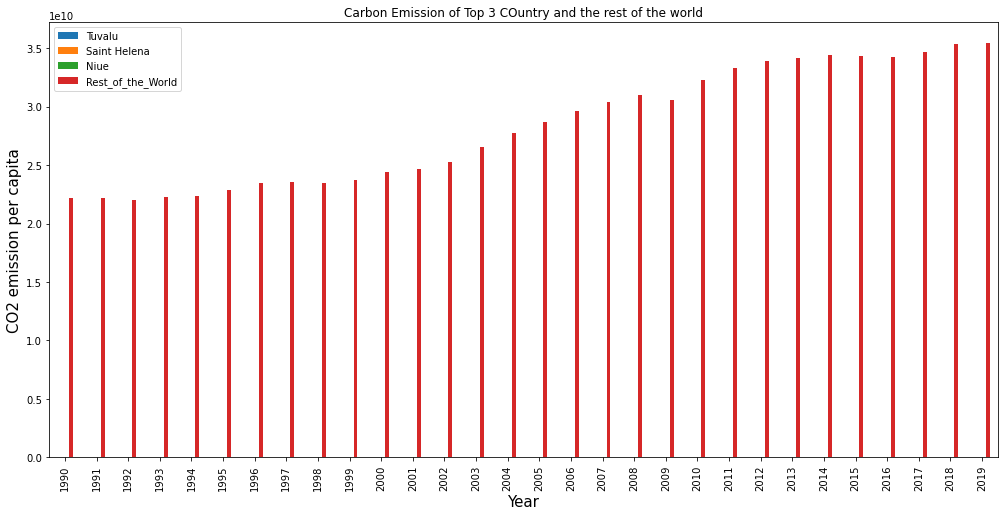

In [200]:
new_dfa_diff_final_res_index_trans_ren.plot(use_index=True,kind='bar',stacked=False, title='Carbon Emission of Top 3 COuntry and the rest of the world', figsize = (17, 8))
plt.xlabel ('Year', fontsize=15)
plt.ylabel('CO2 emission per capita', fontsize=15)

In [170]:
#new_dfa_diff_final_pie_ren_trans2 = new_dfa_diff_final_pie_ren.transpose()
#new_dfa_diff_final_pie_ren_trans2
#new_dfa_diff_final_pie_ren.plot(x='Country',y=1991, kind='bar')

Text(0.5, 0, 'Year')

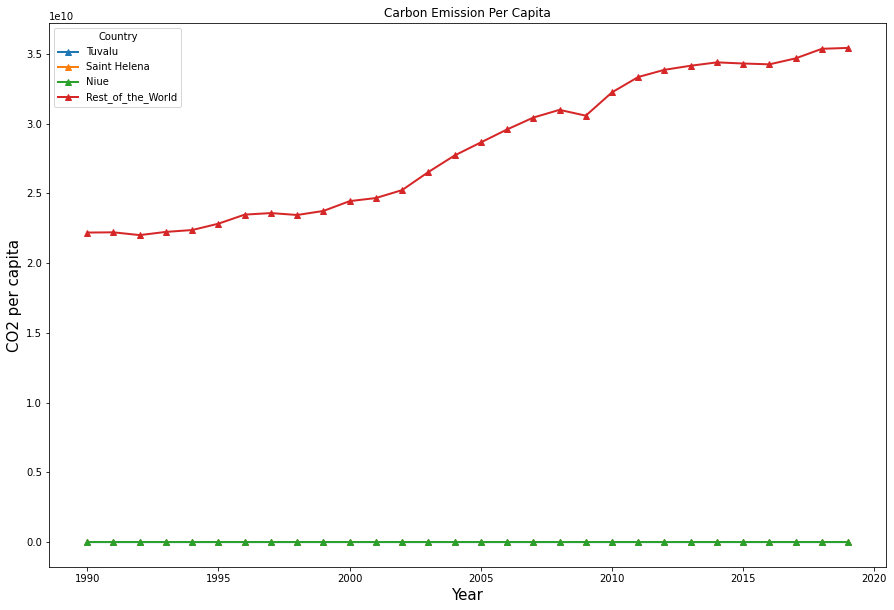

In [198]:
new_dfa_diff_final_line = new_dfa_diff_final_res_index_trans.plot(use_index=True, y=["Tuvalu", "Saint Helena", "Niue", "Rest_of_the_World"], kind="line", figsize=(15, 10), linewidth=2, marker='^')
plt.title("Carbon Emission Per Capita")
plt.ylabel("CO2 per capita", fontsize = 15)
plt.xlabel( 'Year', fontsize = 15)

The grouped bar graph and the line graph shows that the three countries have very low contribution of carbon dioxide compared to the rest of the world as the plot is almost not visible on the chart. 

In [27]:
#import CO2 Concentration Datasets and convert it into dataframe
df2=pd.read_excel('Concentration_of_Carbon_dioxide_1959_to_2020.xlsx')
dfb=pd.DataFrame(df2)
dfb.rename(columns = {'Mean':'CO2_Concentration_Mean'}, inplace = True)
dfb_mean = pd.DataFrame(dfb)
dfb_mean

Year  CO2_Concentration_Mean
0   1959                  315.98
1   1960                  316.91
2   1961                  317.64
3   1962                  318.45
4   1963                  318.99
5   1964                  319.62
6   1965                  320.04
7   1966                  321.37
8   1967                  322.18
9   1968                  323.05
10  1969                  324.62
11  1970                  325.68
12  1971                  326.32
13  1972                  327.46
14  1973                  329.68
15  1974                  330.19
16  1975                  331.12
17  1976                  332.03
18  1977                  333.84
19  1978                  335.41
20  1979                  336.84
21  1980                  338.76
22  1981                  340.12
23  1982                  341.48
24  1983                  343.15
25  1984                  344.85
26  1985                  346.35
27  1986                  347.61
28  1987                  349.31
29  1988                  351.69
30  1989                  353.20
31  1990                  354.45
32  1991                  355.70
33  1992                  356.54
34  1993                  357.21
35  1994                  358.96
36  1995                  360.97
37  1996                  362.74
38  1997                  363.88
39  1998                  366.84
40  1999                  368.54
41  2000                  369.71
42  2001                  371.32
43  2002                  373.45
44  2003                  375.98
45  2004                  377.70
46  2005                  379.98
47  2006                  382.09
48  2007                  384.03
49  2008                  385.83
50  2009                  387.64
51  2010                  390.10
52  2011                  391.85
53  2012                  394.06
54  2013                  396.74
55  2014                  398.87
56  2015                  401.01
57  2016                  404.41
58  2017                  406.76
59  2018                  408.72
60  2019                  411.66
61  2020                  414.24

In [28]:
#Compute the percent change if the Concentration every year
dfb_mean['Concentration Percent Change'] = dfb_mean['CO2_Concentration_Mean'].pct_change()
dfb_mean_pct= pd.DataFrame(dfb_mean)
dfb_mean_pct

Year  CO2_Concentration_Mean  Concentration Percent Change
0   1959                  315.98                           NaN
1   1960                  316.91                      0.002943
2   1961                  317.64                      0.002303
3   1962                  318.45                      0.002550
4   1963                  318.99                      0.001696
5   1964                  319.62                      0.001975
6   1965                  320.04                      0.001314
7   1966                  321.37                      0.004156
8   1967                  322.18                      0.002520
9   1968                  323.05                      0.002700
10  1969                  324.62                      0.004860
11  1970                  325.68                      0.003265
12  1971                  326.32                      0.001965
13  1972                  327.46                      0.003494
14  1973                  329.68                      0.006779
15  1974                  330.19                      0.001547
16  1975                  331.12                      0.002817
17  1976                  332.03                      0.002748
18  1977                  333.84                      0.005451
19  1978                  335.41                      0.004703
20  1979                  336.84                      0.004263
21  1980                  338.76                      0.005700
22  1981                  340.12                      0.004015
23  1982                  341.48                      0.003999
24  1983                  343.15                      0.004890
25  1984                  344.85                      0.004954
26  1985                  346.35                      0.004350
27  1986                  347.61                      0.003638
28  1987                  349.31                      0.004891
29  1988                  351.69                      0.006813
30  1989                  353.20                      0.004294
31  1990                  354.45                      0.003539
32  1991                  355.70                      0.003527
33  1992                  356.54                      0.002362
34  1993                  357.21                      0.001879
35  1994                  358.96                      0.004899
36  1995                  360.97                      0.005600
37  1996                  362.74                      0.004903
38  1997                  363.88                      0.003143
39  1998                  366.84                      0.008135
40  1999                  368.54                      0.004634
41  2000                  369.71                      0.003175
42  2001                  371.32                      0.004355
43  2002                  373.45                      0.005736
44  2003                  375.98                      0.006775
45  2004                  377.70                      0.004575
46  2005                  379.98                      0.006037
47  2006                  382.09                      0.005553
48  2007                  384.03                      0.005077
49  2008                  385.83                      0.004687
50  2009                  387.64                      0.004691
51  2010                  390.10                      0.006346
52  2011                  391.85                      0.004486
53  2012                  394.06                      0.005640
54  2013                  396.74                      0.006801
55  2014                  398.87                      0.005369
56  2015                  401.01                      0.005365
57  2016                  404.41                      0.008479
58  2017                  406.76                      0.005811
59  2018                  408.72                      0.004819
60  2019                  411.66                      0.007193
61  2020                  414.24                      0.006267

Text(0.5, 0, 'Year')

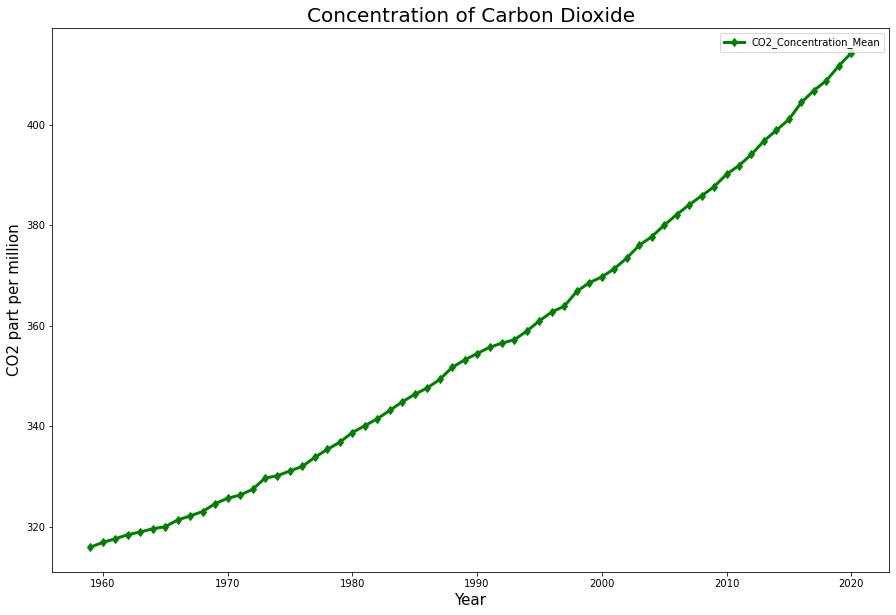

In [203]:
#Visualize the dataframe through line graph
dfb_line = dfb_mean.plot(x="Year", y="CO2_Concentration_Mean", kind="line", figsize=(15, 10), linewidth=3, marker='d', color='g')
dfb_line = plt.title("Concentration of Carbon Dioxide", fontsize = 20)
plt.ylabel('CO2 part per million', fontsize=15)
plt.xlabel('Year', fontsize=15)

This shows that the concentration of carbon is increasing every year. 

In [30]:
#Extract the rows of 1990 to 2019
dfb_new=dfb_mean_pct.iloc[31:61,]
dfb_new

Year  CO2_Concentration_Mean  Concentration Percent Change
31  1990                  354.45                      0.003539
32  1991                  355.70                      0.003527
33  1992                  356.54                      0.002362
34  1993                  357.21                      0.001879
35  1994                  358.96                      0.004899
36  1995                  360.97                      0.005600
37  1996                  362.74                      0.004903
38  1997                  363.88                      0.003143
39  1998                  366.84                      0.008135
40  1999                  368.54                      0.004634
41  2000                  369.71                      0.003175
42  2001                  371.32                      0.004355
43  2002                  373.45                      0.005736
44  2003                  375.98                      0.006775
45  2004                  377.70                      0.004575
46  2005                  379.98                      0.006037
47  2006                  382.09                      0.005553
48  2007                  384.03                      0.005077
49  2008                  385.83                      0.004687
50  2009                  387.64                      0.004691
51  2010                  390.10                      0.006346
52  2011                  391.85                      0.004486
53  2012                  394.06                      0.005640
54  2013                  396.74                      0.006801
55  2014                  398.87                      0.005369
56  2015                  401.01                      0.005365
57  2016                  404.41                      0.008479
58  2017                  406.76                      0.005811
59  2018                  408.72                      0.004819
60  2019                  411.66                      0.007193

In [205]:
#calculate the mean of carbon emission each year based on Total_CO2_Emission
dfa_pivot_dropna_sort_indexyear1['Emission Mean'] = dfa_pivot_dropna_sort_indexyear1.mean(axis=1)
#drop the column Total_CO2_Emission
dfa_pivot_dropna_sort_indexyear1_mean= dfa_pivot_dropna_sort_indexyear1.drop(['Total_CO2_Emission'], axis=1)
dfa_pivot_dropna_sort_indexyear1_mean

Annual_CO2_emissions                                             \
Entity               Tuvalu Saint Helena     Niue Montserrat     Nauru   
Year                                                                     
1990                10992.0       7328.0   7328.0    29312.0  124576.0   
1991                 7328.0       7328.0   7328.0    29312.0  124576.0   
1992                 7328.0       7328.0   7328.0    29312.0  120912.0   
1993                 7328.0      10992.0   7328.0    29312.0  113584.0   
1994                 7328.0      10992.0   7328.0    32976.0  109920.0   
1995                10992.0      10992.0   7328.0    32976.0  106256.0   
1996                 7328.0      10992.0   7328.0    36640.0  102592.0   
1997                 7328.0      10992.0   7328.0    32976.0  102592.0   
1998                10992.0      10992.0   7328.0    29312.0   98928.0   
1999                 3664.0      10992.0   7328.0    36640.0   91600.0   
2000                 7328.0      10992.0   7328.0    25648.0   84272.0   
2001                10992.0      10992.0   7328.0    25648.0   80608.0   
2002                10992.0      10992.0   7328.0    47632.0   76944.0   
2003                10992.0      10992.0   3664.0    36640.0   65952.0   
2004                10992.0      10992.0   3664.0    47632.0   65952.0   
2005                 7328.0      10992.0   3664.0    40304.0   62288.0   
2006                10992.0      10992.0   3664.0    40304.0   43968.0   
2007                10992.0      10992.0   3664.0    40304.0   43968.0   
2008                10992.0      10992.0   7328.0    47632.0   43968.0   
2009                10992.0      10992.0   3664.0    43968.0   40304.0   
2010                10992.0      10992.0   3664.0    62288.0   43968.0   
2011                10992.0      10992.0   7328.0    40304.0   40304.0   
2012                10992.0      10992.0   7328.0    43968.0   43968.0   
2013                10992.0      10992.0   7328.0    51296.0   47632.0   
2014                 7328.0      10992.0  10992.0    47632.0   51296.0   
2015                 7328.0      10992.0   7328.0    58624.0   54960.0   
2016                 7328.0      14656.0   7328.0    29312.0   51296.0   
2017                 7328.0      10992.0   7328.0    29312.0   54960.0   
2018                 7328.0      10992.0  10992.0    29312.0   54960.0   
2019                 7553.0      10729.0  11330.0    28610.0   56651.0   

                                                                              \
Entity Saint Pierre and Miquelon Kiribati Cook Islands Sao Tome and Principe   
Year                                                                           
1990                     91600.0  21984.0      40304.0               47632.0   
1991                    102592.0  21984.0      40304.0               47632.0   
1992                     95264.0  25648.0      40304.0               47632.0   
1993                     73280.0  29312.0      43968.0               47632.0   
1994                     69616.0  29312.0      43968.0               47632.0   
1995                     69616.0  29312.0      43968.0               47632.0   
1996                     69616.0  29312.0      47632.0               47632.0   
1997                     47632.0  29312.0      47632.0               47632.0   
1998                     54960.0  29312.0      47632.0               47632.0   
1999                     54960.0  29312.0      47632.0               47632.0   
2000                     54960.0  32976.0      47632.0               47632.0   
2001                     54960.0  29312.0      36640.0               51296.0   
2002                     58624.0  40304.0      25648.0               58624.0   
2003                     62288.0  43968.0      29312.0               65952.0   
2004                     58624.0  47632.0      51296.0               73280.0   
2005                     62288.0  58624.0      62288.0               76944.0   
2006                     65952.0  65952.0   

In [206]:
#Extract the Year and Emission Mean column and convert it into new dataframe
dfa_emissionmean = dfa_pivot_dropna_sort_indexyear1_mean[['Emission Mean']]
new_dfa_emissionmean = dfa_emissionmean.reset_index()
new_dfa_emissionmean_merge = pd.DataFrame(new_dfa_emissionmean)
new_dfa_emissionmean_merge.columns = new_dfa_emissionmean_merge.columns.droplevel(1)
new_dfa_emissionmean_merge

Year  Emission Mean
0   1990   2.083723e+08
1   1991   2.085306e+08
2   1992   2.066529e+08
3   1993   2.088211e+08
4   1994   2.100711e+08
5   1995   2.143525e+08
6   1996   2.204522e+08
7   1997   2.214871e+08
8   1998   2.202060e+08
9   1999   2.229125e+08
10  2000   2.295296e+08
11  2001   2.316077e+08
12  2002   2.369640e+08
13  2003   2.491030e+08
14  2004   2.602603e+08
15  2005   2.690530e+08
16  2006   2.777702e+08
17  2007   2.857740e+08
18  2008   2.909801e+08
19  2009   2.870629e+08
20  2010   3.027645e+08
21  2011   3.130921e+08
22  2012   3.179336e+08
23  2013   3.206845e+08
24  2014   3.229428e+08
25  2015   3.221687e+08
26  2016   3.216222e+08
27  2017   3.256348e+08
28  2018   3.320847e+08
29  2019   3.326748e+08

In [33]:
#Compute the percent change of Emission Mean 
new_dfa_emissionmean_merge['Emission Percent Change'] =new_dfa_emissionmean_merge['Emission Mean'].pct_change()
new_dfa_Total_pct_mean = pd.DataFrame(new_dfa_emissionmean_merge)
new_dfa_Total_pct_mean

Year  Emission Mean  Emission Percent Change
0   1990   2.083723e+08                      NaN
1   1991   2.085306e+08                 0.000759
2   1992   2.066529e+08                -0.009004
3   1993   2.088211e+08                 0.010492
4   1994   2.100711e+08                 0.005986
5   1995   2.143525e+08                 0.020380
6   1996   2.204522e+08                 0.028456
7   1997   2.214871e+08                 0.004695
8   1998   2.202060e+08                -0.005784
9   1999   2.229125e+08                 0.012291
10  2000   2.295296e+08                 0.029685
11  2001   2.316077e+08                 0.009054
12  2002   2.369640e+08                 0.023127
13  2003   2.491030e+08                 0.051227
14  2004   2.602603e+08                 0.044790
15  2005   2.690530e+08                 0.033784
16  2006   2.777702e+08                 0.032400
17  2007   2.857740e+08                 0.028815
18  2008   2.909801e+08                 0.018217
19  2009   2.870629e+08                -0.013462
20  2010   3.027645e+08                 0.054698
21  2011   3.130921e+08                 0.034111
22  2012   3.179336e+08                 0.015463
23  2013   3.206845e+08                 0.008652
24  2014   3.229428e+08                 0.007042
25  2015   3.221687e+08                -0.002397
26  2016   3.216222e+08                -0.001696
27  2017   3.256348e+08                 0.012476
28  2018   3.320847e+08                 0.019807
29  2019   3.326748e+08                 0.001777

In [207]:
#Merge the Dataframe of the emission mean & percent change together with Concentration mean &percent change
df3 = pd.merge(new_dfa_Total_pct_mean,dfb_new)
df3

Year  Emission Mean  Emission Percent Change  CO2_Concentration_Mean  \
0   1990   2.083723e+08                      NaN                  354.45   
1   1991   2.085306e+08                 0.000759                  355.70   
2   1992   2.066529e+08                -0.009004                  356.54   
3   1993   2.088211e+08                 0.010492                  357.21   
4   1994   2.100711e+08                 0.005986                  358.96   
5   1995   2.143525e+08                 0.020380                  360.97   
6   1996   2.204522e+08                 0.028456                  362.74   
7   1997   2.214871e+08                 0.004695                  363.88   
8   1998   2.202060e+08                -0.005784                  366.84   
9   1999   2.229125e+08                 0.012291                  368.54   
10  2000   2.295296e+08                 0.029685                  369.71   
11  2001   2.316077e+08                 0.009054                  371.32   
12  2002   2.369640e+08                 0.023127                  373.45   
13  2003   2.491030e+08                 0.051227                  375.98   
14  2004   2.602603e+08                 0.044790                  377.70   
15  2005   2.690530e+08                 0.033784                  379.98   
16  2006   2.777702e+08                 0.032400                  382.09   
17  2007   2.857740e+08                 0.028815                  384.03   
18  2008   2.909801e+08                 0.018217                  385.83   
19  2009   2.870629e+08                -0.013462                  387.64   
20  2010   3.027645e+08                 0.054698                  390.10   
21  2011   3.130921e+08                 0.034111                  391.85   
22  2012   3.179336e+08                 0.015463                  394.06   
23  2013   3.206845e+08                 0.008652                  396.74   
24  2014   3.229428e+08                 0.007042                  398.87   
25  2015   3.221687e+08                -0.002397                  401.01   
26  2016   3.216222e+08                -0.001696                  404.41   
27  2017   3.256348e+08                 0.012476                  406.76   
28  2018   3.320847e+08                 0.019807                  408.72   
29  2019   3.326748e+08                 0.001777                  411.66   

    Concentration Percent Change  
0                       0.003539  
1                       0.003527  
2                       0.002362  
3                       0.001879  
4                       0.004899  
5                       0.005600  
6                       0.004903  
7                       0.003143  
8                       0.008135  
9                       0.004634  
10                      0.003175  
11                      0.004355  
12                      0.005736  
13                      0.006775  
14                      0.004575  
15                      0.006037  
16                      0.005553  
17                      0.005077  
18                      0.004687  
19                      0.004691  
20                      0.006346  
21                      0.004486  
22                      0.005640  
23                      0.006801  
24                      0.005369  
25                      0.005365  
26                      0.008479  
27                      0.005811  
28                      0.004819  
29                      0.007193

In [35]:
#import the Global Surface Temperature Datasets
dataset = pd.read_csv("GLB.Ts+dSST.csv")
%matplotlib inline
import seaborn as sn

pd.set_option('display.max_rows', None)
dataset

Year   Jan   Feb   Mar   Apr   May   Jun   Jul    Aug    Sep    Oct  \
0    1880 -0.30 -0.21 -0.18 -0.28 -0.14 -0.29 -0.24  -0.08  -0.17  -0.16   
1    1881 -0.09 -0.14  0.01 -0.03 -0.04 -0.28 -0.06  -0.02  -0.08  -0.19   
2    1882  0.10  0.09  0.02 -0.20 -0.17 -0.25 -0.10   0.04  -0.01  -0.22   
3    1883 -0.33 -0.42 -0.17 -0.24 -0.25 -0.11 -0.08  -0.13  -0.18  -0.11   
4    1884 -0.18 -0.11 -0.34 -0.36 -0.31 -0.38 -0.34  -0.26  -0.23  -0.22   
5    1885 -0.64 -0.29 -0.23 -0.44 -0.41 -0.50 -0.28  -0.27  -0.19  -0.19   
6    1886 -0.42 -0.45 -0.41 -0.29 -0.27 -0.39 -0.16  -0.31  -0.19  -0.25   
7    1887 -0.66 -0.48 -0.32 -0.37 -0.33 -0.20 -0.19  -0.27   -0.2  -0.32   
8    1888 -0.42 -0.43 -0.47 -0.29 -0.22 -0.20 -0.10  -0.11  -0.08   0.01   
9    1889 -0.20  0.14  0.04  0.04 -0.03 -0.12 -0.05  -0.18  -0.18  -0.22   
10   1890 -0.48 -0.48 -0.41 -0.38 -0.48 -0.27 -0.29  -0.36  -0.36  -0.23   
11   1891 -0.46 -0.48 -0.15 -0.26 -0.17 -0.22 -0.22  -0.21  -0.14  -0.23   
12   1892 -0.26 -0.15 -0.36 -0.35 -0.25 -0.20 -0.27   -0.2  -0.25  -0.16   
13   1893 -0.68 -0.51 -0.24 -0.33 -0.35 -0.23 -0.14  -0.23  -0.18  -0.16   
14   1894 -0.55 -0.32 -0.22 -0.42 -0.30 -0.44 -0.32  -0.28  -0.22  -0.17   
15   1895 -0.44 -0.43 -0.30 -0.23 -0.23 -0.25 -0.17  -0.16  -0.02   -0.1   
16   1896 -0.23 -0.15 -0.30 -0.33 -0.20 -0.14 -0.06   -0.1  -0.05   0.04   
17   1897 -0.23 -0.20 -0.13 -0.02 -0.01 -0.13 -0.05  -0.03  -0.05  -0.09   
18   1898 -0.07 -0.33 -0.56 -0.34 -0.36 -0.22 -0.23  -0.24  -0.19  -0.32   
19   1899 -0.18 -0.40 -0.35 -0.21 -0.20 -0.26 -0.14  -0.05  -0.02      0   
20   1900 -0.40 -0.08  0.01 -0.15 -0.06 -0.15 -0.08  -0.04   0.02   0.08   
21   1901 -0.28 -0.06  0.04 -0.06 -0.17 -0.10 -0.09  -0.13  -0.17  -0.29   
22   1902 -0.19 -0.04 -0.30 -0.29 -0.32 -0.34 -0.26  -0.28  -0.22  -0.27   
23   1903 -0.28 -0.06 -0.24 -0.40 -0.42 -0.45 -0.30  -0.44  -0.43  -0.42   
24   1904 -0.64 -0.54 -0.46 -0.51 -0.51 -0.50 -0.48  -0.44  -0.47  -0.35   
25   1905 -0.38 -0.59 -0.25 -0.37 -0.34 -0.32 -0.24  -0.21  -0.15  -0.24   
26   1906 -0.31 -0.32 -0.15 -0.03 -0.21 -0.21 -0.25  -0.18  -0.25   -0.2   
27   1907 -0.44 -0.52 -0.24 -0.40 -0.46 -0.43 -0.36  -0.37  -0.33  -0.24   
28   1908 -0.46 -0.36 -0.58 -0.46 -0.41 -0.39 -0.35  -0.45  -0.33  -0.43   
29   1909 -0.70 -0.47 -0.52 -0.59 -0.54 -0.52 -0.43   -0.3  -0.37  -0.39   
30   1910 -0.43 -0.43 -0.48 -0.38 -0.34 -0.37 -0.32  -0.34  -0.37  -0.39   
31   1911 -0.63 -0.60 -0.62 -0.55 -0.52 -0.47 -0.41  -0.44  -0.39  -0.26   
32   1912 -0.28 -0.15 -0.38 -0.21 -0.20 -0.25 -0.41  -0.52  -0.48  -0.56   
33   1913 -0.41 -0.44 -0.43 -0.36 -0.45 -0.46 -0.36  -0.34  -0.34  -0.35   
34   1914  0.01 -0.14 -0.23 -0.27 -0.20 -0.23 -0.24  -0.14  -0.13  -0.05   
35   1915 -0.18 -0.01 -0.11  0.08 -0.03 -0.14 -0.03  -0.16  -0.13  -0.22   
36   1916 -0.19 -0.21 -0.32 -0.25 -0.26 -0.42 -0.33  -0.26  -0.28  -0.27   
37   1917 -0.47 -0.56 -0.49 -0.39 -0.48 -0.40 -0.23  -0.26  -0.18  -0.35   
38   1918 -0.44 -0.31 -0.19 -0.40 -0.37 -0.28 -0.20  -0.26  -0.14  -0.04   
39   1919 -0.19 -0.22 -0.27 -0.19 -0.20 -0.28 -0.21  -0.19  -0.17  -0.15   
40   1920 -0.15 -0.23 -0.06 -0.26 -0.25 -0.33 -0.32  -0.29  -0.19  -0.28   
41   1921 -0.04 -0.21 -0.28 -0.36 -0.36 -0.31 -0.15  -0.24  -0.17  -0.06   
42   1922 -0.32 -0.42 -0.13 -0.21 -0.34 -0.33 -0.26   -0.3  -0.28  -0.32   
43   1923 -0.26 -0.36 -0.31 -0.37 -0.33 -0.23 -0.28  -0.29  -0.27  -0.12   
44   1924 -0.23 -0.26 -0.12 -0.35 -0.19 -0.27 -0.26  -0.34  -0.31  -0.35   
45   1925 -0.32 -0.33 -0.22 -0.24 -0.30 -0.33 -0.29  -0.18  -0.13  -0.17   
46   1926  0.20  0.07  0.12 -0.14 -0.24 -0.25 -0.20   -0.1   -0.1  -0.11   
47   1927 -0.28 -0.19 -0.38 -0.31 -0.24 -0.27 -0.13  -0.18  -0.05  -0.01   
48   1928 -0.02 -0.11 -0.28 -0.29 -0.30 -0.41 -0.21  -0.25  -0.19  -0.19   
49   1929 -0.47 -0.58 -0.34 -0.42 -0.39 -0.43 -0.32  -0.29  -0.23  -0.15   
50   1930 -0.28 -0.23 -0.09 -0.25 -0.24 -0.18 -0.15  -0.09   -0.1  -0.08   
51   1931 -0.10 -0.20 -0.06 -0.20 -0.22 -0.05  0.01  

In [208]:
with open('GLB.Ts+dSST.csv') as f:df = pd.read_csv(f)

In [210]:
monthly = df.iloc[:, :13]
for col in monthly.columns:monthly[col] = pd.to_numeric(monthly[col], errors='coerce')
monthly = monthly.set_index('Year')
monthly['Ann'] = monthly.mean(axis=1)
monthly

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  \
Year                                                                           
1880 -0.30 -0.21 -0.18 -0.28 -0.14 -0.29 -0.24 -0.08 -0.17 -0.16 -0.19 -0.22   
1881 -0.09 -0.14  0.01 -0.03 -0.04 -0.28 -0.06 -0.02 -0.08 -0.19 -0.26 -0.15   
1882  0.10  0.09  0.02 -0.20 -0.17 -0.25 -0.10  0.04 -0.01 -0.22 -0.21 -0.25   
1883 -0.33 -0.42 -0.17 -0.24 -0.25 -0.11 -0.08 -0.13 -0.18 -0.11 -0.20 -0.18   
1884 -0.18 -0.11 -0.34 -0.36 -0.31 -0.38 -0.34 -0.26 -0.23 -0.22 -0.30 -0.29   
1885 -0.64 -0.29 -0.23 -0.44 -0.41 -0.50 -0.28 -0.27 -0.19 -0.19 -0.22 -0.05   
1886 -0.42 -0.45 -0.41 -0.29 -0.27 -0.39 -0.16 -0.31 -0.19 -0.25 -0.26 -0.25   
1887 -0.66 -0.48 -0.32 -0.37 -0.33 -0.20 -0.19 -0.27 -0.20 -0.32 -0.26 -0.38   
1888 -0.42 -0.43 -0.47 -0.29 -0.22 -0.20 -0.10 -0.11 -0.08  0.01  0.00 -0.13   
1889 -0.20  0.14  0.04  0.04 -0.03 -0.12 -0.05 -0.18 -0.18 -0.22 -0.30 -0.31   
1890 -0.48 -0.48 -0.41 -0.38 -0.48 -0.27 -0.29 -0.36 -0.36 -0.23 -0.37 -0.30   
1891 -0.46 -0.48 -0.15 -0.26 -0.17 -0.22 -0.22 -0.21 -0.14 -0.23 -0.37 -0.02   
1892 -0.26 -0.15 -0.36 -0.35 -0.25 -0.20 -0.27 -0.20 -0.25 -0.16 -0.50 -0.29   
1893 -0.68 -0.51 -0.24 -0.33 -0.35 -0.23 -0.14 -0.23 -0.18 -0.16 -0.17 -0.38   
1894 -0.55 -0.32 -0.22 -0.42 -0.30 -0.44 -0.32 -0.28 -0.22 -0.17 -0.25 -0.22   
1895 -0.44 -0.43 -0.30 -0.23 -0.23 -0.25 -0.17 -0.16 -0.02 -0.10 -0.16 -0.12   
1896 -0.23 -0.15 -0.30 -0.33 -0.20 -0.14 -0.06 -0.10 -0.05  0.04 -0.16 -0.12   
1897 -0.23 -0.20 -0.13 -0.02 -0.01 -0.13 -0.05 -0.03 -0.05 -0.09 -0.18 -0.25   
1898 -0.07 -0.33 -0.56 -0.34 -0.36 -0.22 -0.23 -0.24 -0.19 -0.32 -0.37 -0.22   
1899 -0.18 -0.40 -0.35 -0.21 -0.20 -0.26 -0.14 -0.05 -0.02  0.00  0.12 -0.27   
1900 -0.40 -0.08  0.01 -0.15 -0.06 -0.15 -0.08 -0.04  0.02  0.08 -0.13 -0.14   
1901 -0.28 -0.06  0.04 -0.06 -0.17 -0.10 -0.09 -0.13 -0.17 -0.29 -0.17 -0.30   
1902 -0.19 -0.04 -0.30 -0.29 -0.32 -0.34 -0.26 -0.28 -0.22 -0.27 -0.36 -0.46   
1903 -0.28 -0.06 -0.24 -0.40 -0.42 -0.45 -0.30 -0.44 -0.43 -0.42 -0.39 -0.47   
1904 -0.64 -0.54 -0.46 -0.51 -0.51 -0.50 -0.48 -0.44 -0.47 -0.35 -0.17 -0.29   
1905 -0.38 -0.59 -0.25 -0.37 -0.34 -0.32 -0.24 -0.21 -0.15 -0.24 -0.09 -0.21   
1906 -0.31 -0.32 -0.15 -0.03 -0.21 -0.21 -0.25 -0.18 -0.25 -0.20 -0.39 -0.18   
1907 -0.44 -0.52 -0.24 -0.40 -0.46 -0.43 -0.36 -0.37 -0.33 -0.24 -0.52 -0.50   
1908 -0.46 -0.36 -0.58 -0.46 -0.41 -0.39 -0.35 -0.45 -0.33 -0.43 -0.51 -0.49   
1909 -0.70 -0.47 -0.52 -0.59 -0.54 -0.52 -0.43 -0.30 -0.37 -0.39 -0.32 -0.54   
1910 -0.43 -0.43 -0.48 -0.38 -0.34 -0.37 -0.32 -0.34 -0.37 -0.39 -0.57 -0.69   
1911 -0.63 -0.60 -0.62 -0.55 -0.52 -0.47 -0.41 -0.44 -0.39 -0.26 -0.20 -0.24   
1912 -0.28 -0.15 -0.38 -0.21 -0.20 -0.25 -0.41 -0.52 -0.48 -0.56 -0.38 -0.42   
1913 -0.41 -0.44 -0.43 -0.36 -0.45 -0.46 -0.36 -0.34 -0.34 -0.35 -0.18 -0.03   
1914  0.01 -0.14 -0.23 -0.27 -0.20 -0.23 -0.24 -0.14 -0.13 -0.05 -0.21 -0.09   
1915 -0.18 -0.01 -0.11  0.08 -0.03 -0.14 -0.03 -0.16 -0.13 -0.22 -0.14 -0.25   
1916 -0.19 -0.21 -0.32 -0.25 -0.26 -0.42 -0.33 -0.26 -0.28 -0.27 -0.42 -0.79   
1917 -0.47 -0.56 -0.49 -0.39 -0.48 -0.40 -0.23 -0.26 -0.18 -0.35 -0.27 -0.72   
1918 -0.44 -0.31 -0.19 -0.40 -0.37 -0.28 -0.20 -0.26 -0.14 -0.04 -0.16 -0.29   
1919 -0.19 -0.22 -0.27 -0.19 -0.20 -0.28 -0.21 -0.19 -0.17 -0.15 -0.30 -0.35   
1920 -0.15 -0.23 -0.06 -0.26 -0.25 -0.33 -0.32 -0.29 -0.19 -0.28 -0.33 -0.46   
1921 -0.04 -0.21 -0.28 -0.36 -0.36 -0.31 -0.15 -0.24 -0.17 -0.06 -0.16 -0.18   
1922 -0.32 -0.42 -0.13 -0.21 -0.34 -0.33 -0.26 -0.30 -0.28 -0.32 -0.16 -0.17   
1923 -0.26 -0.36 -0.31 -0.37 -0.33 -0.23 -0.28 -0.29 -0.27 -0.12  0.03 -0.05   
1924 -0.23 -0.26 -0.12 -0.35 -0.19 -0.27 -0.26 -0.34 -0.31 -0.35 -0.23 -0.41   
1925 -0.32 -0.33 -0.22 -0.24 -0.30 -0.33 -0.29 -0.18 -0.13 -0.17  0.04  0.09   
1926  0.20  0.07  0.12 -0.14 -0.24 -0.25 -0.20 -0.10 -0.10 -0.11 -0.07 -0.30   
1927 -0.28 -0.19 -0.38 -0.31 -0.24 -0.27 -0.13 -0.18 -0.05 -0.01 -0.04 -0.36   
1928 -0

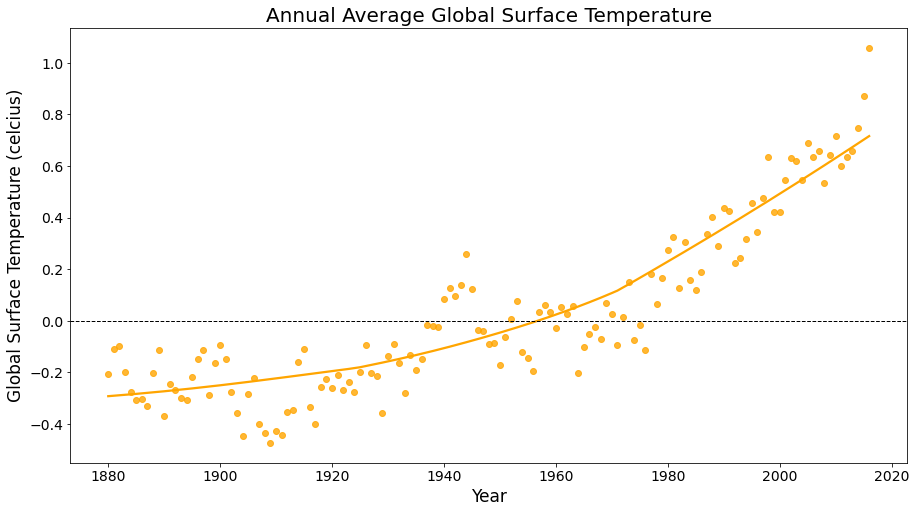

In [215]:
fig2 = plt.figure()
fig2.set_size_inches(15,8)
sn.regplot(x=monthly.index.values, y=monthly.Ann, lowess=True, color='orange')
plt.title("Annual Average Global Surface Temperature", size=20)
plt.ylabel('Global Surface Temperature (celcius)', size=17)
plt.xlabel("Year", size=17)
plt.xticks(size=14)
plt.yticks(size=14)
plt.axhline(y=0, linewidth=1, ls='--', color='black')

INTERPRETATION OF THE GRAPH

This graph shows that there is an increase of temperatue in every year. Thoughm temperature varies every month, it is visible that there is increase in heat as time passed by. 

In [225]:
#extract the columns year and ann
monthly_new = monthly[['Ann']]
monthly_new_df = pd.DataFrame(monthly_new)
monthly_new_df
#monthly_new

Ann
Year          
1880 -0.205000
1881 -0.110833
1882 -0.096667
1883 -0.200000
1884 -0.276667
1885 -0.309167
1886 -0.304167
1887 -0.331667
1888 -0.203333
1889 -0.114167
1890 -0.367500
1891 -0.244167
1892 -0.270000
1893 -0.300000
1894 -0.309167
1895 -0.217500
1896 -0.150000
1897 -0.114167
1898 -0.287500
1899 -0.163333
1900 -0.093333
1901 -0.148333
1902 -0.277500
1903 -0.358333
1904 -0.446667
1905 -0.282500
1906 -0.223333
1907 -0.400833
1908 -0.435000
1909 -0.474167
1910 -0.425833
1911 -0.444167
1912 -0.353333
1913 -0.345833
1914 -0.160000
1915 -0.110000
1916 -0.333333
1917 -0.400000
1918 -0.256667
1919 -0.226667
1920 -0.262500
1921 -0.210000
1922 -0.270000
1923 -0.236667
1924 -0.276667
1925 -0.198333
1926 -0.093333
1927 -0.203333
1928 -0.212500
1929 -0.356667
1930 -0.135000
1931 -0.091667
1932 -0.165000
1933 -0.281667
1934 -0.134167
1935 -0.191667
1936 -0.147500
1937 -0.018333
1938 -0.021667
1939 -0.025833
1940  0.083333
1941  0.125833
1942  0.096667
1943  0.136667
1944  0.260000
1945  0.123333
1946 -0.034167
1947 -0.041667
1948 -0.090000
1949 -0.085000
1950 -0.172500
1951 -0.064167
1952  0.008333
1953  0.075833
1954 -0.120000
1955 -0.145000
1956 -0.196667
1957  0.034167
1958  0.062500
1959  0.033333
1960 -0.026667
1961  0.054167
1962  0.024167
1963  0.056667
1964 -0.201667
1965 -0.103333
1966 -0.050833
1967 -0.023333
1968 -0.070000
1969  0.068333
1970  0.027500
1971 -0.092500
1972  0.013333
1973  0.151667
1974 -0.075833
1975 -0.015833
1976 -0.114167
1977  0.182500
1978  0.065000
1979  0.164167
1980  0.272500
1981  0.325000
1982  0.128333
1983  0.305833
1984  0.157500
1985  0.118333
1986  0.190000
1987  0.335833
1988  0.403333
1989  0.289167
1990  0.436667
1991  0.424167
1992  0.224167
1993  0.244167
1994  0.317500
1995  0.455000
1996  0.345000
1997  0.475833
1998  0.633333
1999  0.420000
2000  0.423333
2001  0.546667
2002  0.630833
2003  0.618333
2004  0.547500
2005  0.690833
2006  0.634167
2007  0.658333
2008  0.535000
2009  0.644167
2010  0.715833
2011  0.601667
2012  0.635833
2013  0.656667
2014  0.748333
2015  0.870833
2016  1.058571

In [264]:
#Extract the year 1990 to 2016
monthly_new_dfa = monthly_new_df.iloc[1990:2016]
monthly_new_dfa_res['Temperature Percent Change'] = monthly_new_dfa_res['Ann'].pct_change()
monthly_new_dfa_pct = pd.DataFrame(monthly_new_dfa_res)
monthly_new_dfa_pct_noindex= monthly_new_dfa_pct.drop(columns='index')

In [265]:
#merge the dataframe of emission, concentration and temperature
df4 = pd.merge(df3,monthly_new_dfa_pct_noindex)
df4.rename(columns = {'Ann':'Global Temperature', 'Percent Change':'Emission Percent Change'}, inplace = True)
new_df4 = pd.DataFrame(df4)
new_df4_drop=new_df4.drop(['Emission Percent Change', 'Concentration Percent Change', 'Temperature Percent Change'], axis =1)

In [266]:
new_df4_drop.corr()

Year  Emission Mean  CO2_Concentration_Mean  \
Year                    1.000000       0.974566                0.997550   
Emission Mean           0.974566       1.000000                0.984079   
CO2_Concentration_Mean  0.997550       0.984079                1.000000   
Global Temperature      0.844230       0.802505                0.848277   

                        Global Temperature  
Year                              0.844230  
Emission Mean                     0.802505  
CO2_Concentration_Mean            0.848277  
Global Temperature                1.000000

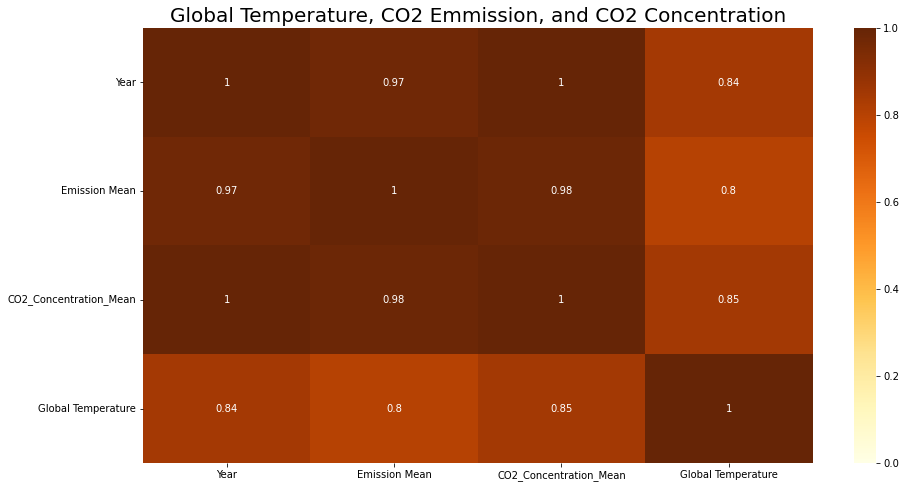

In [267]:
#visualize the correlation matrix
fig2 = plt.figure()
fig2.set_size_inches(15,8)
cmap=sn.diverging_palette(300,250,as_cmap =True)
corrMatrix = new_df4_drop.corr()
sn.heatmap(corrMatrix, annot=True, cmap='YlOrBr',vmin=0.0)
plt.title ('Global Temperature, CO2 Emmission, and CO2 Concentration', fontsize = 20)
plt.show()

The heatmap shows the relationship of each variabel from CO2 Emission,CO2 Concentration and Global Temperature. The variable that has higher value of relationship was represented with light color and the one with lower value was represented with dark color. 

This figure shows that the relationship of Carbon emission mean, increases as the concenctration mean increases, and the global temperature mean also increases as the two variable increase. 

In [275]:
new_df4_char = df4.drop(['Emission Mean', 'CO2_Concentration_Mean', 'Global Temperature'], axis =1)
new_df4_char


Year  Emission Percent Change  Concentration Percent Change  \
0   1990                      NaN                      0.003539   
1   1991                 0.000759                      0.003527   
2   1992                -0.009004                      0.002362   
3   1993                 0.010492                      0.001879   
4   1994                 0.005986                      0.004899   
5   1995                 0.020380                      0.005600   
6   1996                 0.028456                      0.004903   
7   1997                 0.004695                      0.003143   
8   1998                -0.005784                      0.008135   
9   1999                 0.012291                      0.004634   
10  2000                 0.029685                      0.003175   
11  2001                 0.009054                      0.004355   
12  2002                 0.023127                      0.005736   
13  2003                 0.051227                      0.006775   
14  2004                 0.044790                      0.004575   
15  2005                 0.033784                      0.006037   
16  2006                 0.032400                      0.005553   
17  2007                 0.028815                      0.005077   
18  2008                 0.018217                      0.004687   
19  2009                -0.013462                      0.004691   
20  2010                 0.054698                      0.006346   
21  2011                 0.034111                      0.004486   
22  2012                 0.015463                      0.005640   
23  2013                 0.008652                      0.006801   
24  2014                 0.007042                      0.005369   
25  2015                -0.002397                      0.005365   

    Temperature Percent Change  
0                          NaN  
1                    -0.028626  
2                    -0.471513  
3                     0.089219  
4                     0.300341  
5                     0.433071  
6                    -0.241758  
7                     0.379227  
8                     0.330998  
9                    -0.336842  
10                    0.007937  
11                    0.291339  
12                    0.153963  
13                   -0.019815  
14                   -0.114555  
15                    0.261796  
16                   -0.082027  
17                    0.038108  
18                   -0.187342  
19                    0.204050  
20                    0.111255  
21                   -0.159488  
22                    0.056787  
23                    0.032765  
24                    0.139594  
25                    0.163697

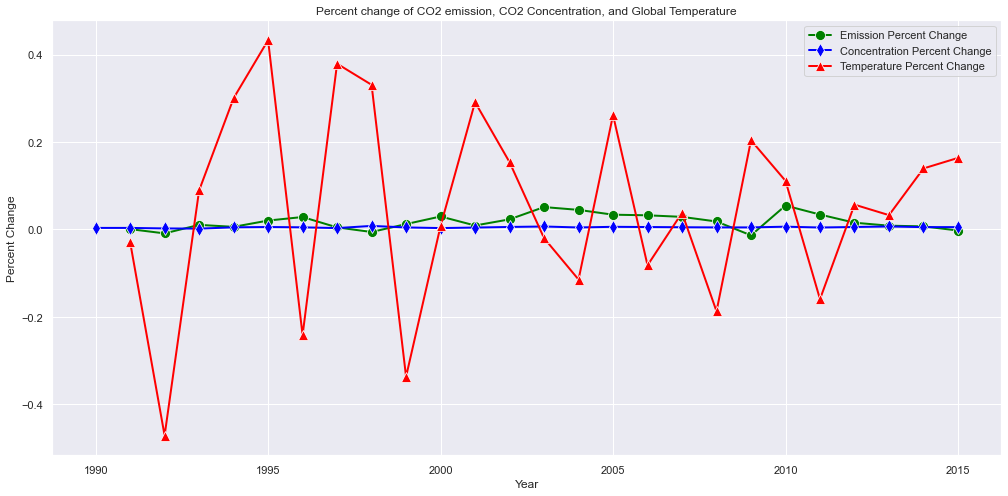

In [302]:
fig2 = plt.figure()
fig2.set_size_inches(17,8)
sn.set_theme(style='darkgrid')
sn.lineplot(x='Year', y='Emission Percent Change', data = new_df4_char, marker='o', color='green', linewidth='2', ms='10')
sn.lineplot(x='Year', y='Concentration Percent Change', data = new_df4_char, marker='d', color='blue', linewidth='2', ms='10')
sn.lineplot(x='Year', y='Temperature Percent Change', data = new_df4_char, marker='^', color='red', linewidth ='2', ms='10')
plt.title('Percent change of CO2 emission, CO2 Concentration, and Global Temperature')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.legend(labels =['Emission Percent Change', 'Concentration Percent Change', 'Temperature Percent Change'])
plt.show()